# Data Analysis, Visualization & Match Results Prediction of Manchester United in Premier League

Group Members: Qing Peng, Ran Qin, Qiangqiang Zhang, Zhang Zhang, Eshwari Bhide

## I. Data Preparation

### Import Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install --upgrade pandas

Requirement already up-to-date: pandas in /Users/zqq/opt/anaconda3/lib/python3.8/site-packages (1.4.3)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
pd.__version__

'1.4.3'

### Load the dataset as an example

In [5]:
# 2021/2022 Season DataFrame EPL_df
df = pd.read_csv('data/E0-21-22.csv')
df   # 380 rows, 106 columns

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,22/05/2022,16:00,Crystal Palace,Man United,1,0,H,1,0,...,2.04,0.25,1.68,2.15,1.74,2.23,1.88,2.25,1.74,2.16
376,E0,22/05/2022,16:00,Leicester,Southampton,4,1,H,0,0,...,2.63,-0.75,1.83,2.07,1.88,2.03,1.94,2.26,1.87,2.01
377,E0,22/05/2022,16:00,Liverpool,Wolves,3,1,H,1,1,...,3.28,-2.50,2.02,1.77,2.06,1.83,2.19,1.99,2.07,1.80
378,E0,22/05/2022,16:00,Man City,Aston Villa,3,2,H,0,1,...,3.36,-2.25,2.06,1.84,2.05,1.86,2.09,2.03,2.01,1.87


### Observation and Analysis (eg. statistics)

In [6]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,379.000000,379.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.513158,1.305263,0.681579,0.589474,13.847368,11.736842,4.678947,4.142105,10.055263,10.157895,...,2.070053,-0.248026,1.933193,1.966069,1.951105,1.975447,2.021211,2.054711,1.926868,1.958500
std,1.326545,1.258836,0.832187,0.808853,5.661784,5.348460,2.600402,2.589978,3.444180,3.718501,...,0.404372,0.950713,0.104168,0.099308,0.105294,0.106912,0.113965,0.111772,0.093221,0.094822
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,...,1.480000,-2.750000,1.650000,1.700000,1.660000,1.720000,1.800000,1.820000,1.700000,1.750000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,8.000000,3.000000,2.000000,8.000000,7.000000,...,1.780000,-0.750000,1.855000,1.900000,1.870000,1.907500,1.940000,1.960000,1.850000,1.890000
50%,1.000000,1.000000,0.000000,0.000000,13.500000,11.000000,4.000000,4.000000,10.000000,10.000000,...,1.990000,-0.250000,1.940000,1.970000,1.950000,1.970000,2.010000,2.050000,1.925000,1.955000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,15.000000,6.000000,6.000000,12.000000,12.250000,...,2.230000,0.250000,2.020000,2.050000,2.020000,2.050000,2.100000,2.140000,2.000000,2.040000
max,7.000000,6.000000,4.000000,4.000000,31.000000,31.000000,15.000000,14.000000,22.000000,25.000000,...,3.780000,2.500000,2.150000,2.200000,2.260000,2.380000,2.850000,2.520000,2.150000,2.230000


In [7]:
df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [8]:
df.dtypes

Div          object
Date         object
Time         object
HomeTeam     object
AwayTeam     object
             ...   
PCAHA       float64
MaxCAHH     float64
MaxCAHA     float64
AvgCAHH     float64
AvgCAHA     float64
Length: 106, dtype: object

In [9]:
# 2012/2013 Season DataFrame EPL_df
df_2012 = pd.read_csv('data/E0-12-13.csv')
len(df_2012.columns)

74

In [10]:
# 2013/2014 Season DataFrame EPL_df
df_2013 = pd.read_csv('data/E0-13-14.csv')
len(df_2013.columns)

68

**Our observation**: We find that the past 22 seasons's dataframe have different number of columns, so we need to find columns shared by the 22 dataframes

In [11]:
# csv List 
csv_lst = ['0001.csv', '0102.csv', '0203.csv', '0304.csv', '0405.csv', '0506.csv', '0607.csv', 
           'E0-07-08.csv', 'E0-08-09.csv', 'E0-09-10.csv', 'E0-10-11.csv', 'E0-11-12.csv', 'E0-12-13.csv', 
           'E0-13-14.csv', 'E0-14-15.csv', 'E0-15-16.csv', 'E0-16-17.csv', 'E0-17-18.csv', 
           'E0-18-19.csv', 'E0-19-20.csv', 'E0-20-21.csv', 'E0-21-22.csv']
for i in range(len(csv_lst)):
    csv_lst[i] = 'data/' + csv_lst[i]

df_ = pd.read_csv(csv_lst[0])
common_columns = set(df_.columns)
for csv in csv_lst[1:]:
    ##
    cols = pd.read_csv(csv, on_bad_lines='skip', encoding_errors='ignore').columns
    common_columns = common_columns.intersection(set(cols))

len(common_columns)

29

In [12]:
df__ = pd.read_csv(csv_lst[-1])
count = 0
intersection_columns = []
for col in df__.columns:
    if col in common_columns:
        count += 1
        # make common_columns in correct order 
        intersection_columns.append(col)
count

29

In [13]:
intersection_columns

['Div',
 'Date',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTHG',
 'HTAG',
 'HTR',
 'Referee',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'IWH',
 'IWD',
 'IWA',
 'WHH',
 'WHD',
 'WHA']

### Description and meaning for each columns 

Ref: https://www.football-data.co.uk/notes.txt

- Key to results data:

Div = League Division

Date = Match Date (dd/mm/yy)

HomeTeam = Home Team

AwayTeam = Away Team

FTHG = Full Time Home Team Goals  

FTAG = Full Time Away Team Goals  

FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win) (result)

HTHG = Half Time Home Team Goals

HTAG = Half Time Away Team Goals

HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

- Match Statistics

Referee = Referee

HS = Home Team Shots

AS = Away Team Shots

HST = Home Team Shots on Target

AST = Away Team Shots on Target

HF = Home Team Fouls Committed

AF = Away Team Fouls Committed

HC = Home Team Corners

AC = Away Team Corners

HY = Home Team Yellow Cards

AY = Away Team Yellow Cards

HR = Home Team Red Cards

AR = Away Team Red Cards



we can simply ignore the other intersection columns like IWH (Interwetten home win odds) and the similar columns since they are betting odds data. We also don't care about the HTR, Referee and Div, just ignore them.

### Determine the columns to be kept that relate to the match statistics and results

In [14]:
kept_columns = intersection_columns[:23]
kept_columns.remove('HTR')
kept_columns.remove('Referee')
kept_columns.remove('Div')
kept_columns

['Date',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTHG',
 'HTAG',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR']

In [15]:
df = pd.read_csv('data/E0-21-22.csv')
df = df[kept_columns]
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,8,22,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,16,10,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,14,14,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,13,4,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,14,6,6,3,13,15,6,8,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,22/05/2022,Crystal Palace,Man United,1,0,H,1,0,6,10,3,4,12,22,3,6,2,4,0,0
376,22/05/2022,Leicester,Southampton,4,1,H,0,0,12,7,6,2,10,5,3,3,0,1,0,0
377,22/05/2022,Liverpool,Wolves,3,1,H,1,1,29,7,8,5,6,3,5,3,1,0,0,0
378,22/05/2022,Man City,Aston Villa,3,2,H,0,1,24,4,5,2,5,11,13,1,0,1,0,0


In [16]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.513158,1.305263,0.681579,0.589474,13.847368,11.736842,4.678947,4.142105,10.055263,10.157895,5.602632,4.821053,1.652632,1.744737,0.050000,0.063158
std,1.326545,1.258836,0.832187,0.808853,5.661784,5.348460,2.600402,2.589978,3.444180,3.718501,3.029755,2.735399,1.258373,1.230912,0.230005,0.243567
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,8.000000,3.000000,2.000000,8.000000,7.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.500000,11.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000,1.500000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,15.000000,6.000000,6.000000,12.000000,12.250000,7.000000,7.000000,2.000000,3.000000,0.000000,0.000000
max,7.000000,6.000000,4.000000,4.000000,31.000000,31.000000,15.000000,14.000000,22.000000,25.000000,15.000000,13.000000,6.000000,5.000000,2.000000,1.000000


In [17]:
df.dtypes

Date        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HTHG         int64
HTAG         int64
HS           int64
AS           int64
HST          int64
AST          int64
HF           int64
AF           int64
HC           int64
AC           int64
HY           int64
AY           int64
HR           int64
AR           int64
dtype: object

In [18]:
df.isnull().sum() # no missing values

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

---
## II. Data Visualization Part - Attack vs Defense between Liverpool and ManU

### Data Cleaning and preprocessing

In [19]:
columns_to_keep = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST']
EPL_df = df[columns_to_keep]
EPL_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST
0,13/08/2021,Brentford,Arsenal,2,0,H,8,22,3,4
1,14/08/2021,Man United,Leeds,5,1,H,16,10,8,3
2,14/08/2021,Burnley,Brighton,1,2,A,14,14,3,8
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,13,4,6,1
4,14/08/2021,Everton,Southampton,3,1,H,14,6,6,3
...,...,...,...,...,...,...,...,...,...,...
375,22/05/2022,Crystal Palace,Man United,1,0,H,6,10,3,4
376,22/05/2022,Leicester,Southampton,4,1,H,12,7,6,2
377,22/05/2022,Liverpool,Wolves,3,1,H,29,7,8,5
378,22/05/2022,Man City,Aston Villa,3,2,H,24,4,5,2


- Prepare dataframe of Engliand Premier Big 5 team in the past 22 seasons 

In [20]:
ManU_df_22seasons = []
Liverp_df_22seasons = []
Arsen_df_22seasons = []
Chels_df_22seasons = []
ManC_df_22seasons = []

def data_clean(csv, season):
    """
    Return new dataframes of five teams covering their 22 seasons England Premier League data 
    with new columns name and new Season column.
    """
    
    # Loading Data
    df = pd.read_csv(csv, on_bad_lines='skip', encoding_errors='ignore')
    columns_to_keep = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST']
    
    # England Premier League DataFrame
    EPL_df = df[columns_to_keep].copy()
    EPL_df.loc[:, 'Season'] = season
    EPL_df.loc[:, 'Games_Played'] = 1
    EPL_df.rename(
        columns={
            'FTHG':'Home_Goals_Scored', 
            'FTAG':'Away_Goals_Scored',
            'FTR':'Full_Time_Result',
            'HS':'Home_Shots',
            'AS':'Away_Shots',
            'HST':'Home_Shots_On_Target', 
            'AST':'Away_Shots_On_Target' 
        }, 
        inplace=True
        )
    
    # Five Teams DataFrames of Each Season
    ManU_df = EPL_df[(EPL_df['HomeTeam'] == 'Man United') | (EPL_df['AwayTeam'] == 'Man United')] 
    Liverp_df = EPL_df[(EPL_df['HomeTeam'] == 'Liverpool') | (EPL_df['AwayTeam'] == 'Liverpool')]
    Arsen_df = EPL_df[(EPL_df['HomeTeam'] == 'Arsenal') | (EPL_df['AwayTeam'] == 'Arsenal')]
    Chels_df = EPL_df[(EPL_df['HomeTeam'] == 'Chelsea') | (EPL_df['AwayTeam'] == 'Chelsea')]
    ManC_df = EPL_df[(EPL_df['HomeTeam'] == 'Man City') | (EPL_df['AwayTeam'] == 'Man City')] 
    
    # Appending Datasets to Obtain 22 Seasons' DataFrame Lists of Five Teams
    ManU_df_22seasons.append(ManU_df)
    Liverp_df_22seasons.append(Liverp_df)
    Arsen_df_22seasons.append(Arsen_df)
    Chels_df_22seasons.append(Chels_df) 
    ManC_df_22seasons.append(ManC_df)
    
    return ManU_df_22seasons, Liverp_df_22seasons, Arsen_df_22seasons, Chels_df_22seasons, ManC_df_22seasons

In [21]:
# csv List and Season List
csv_lst = ['0001.csv', '0102.csv', '0203.csv', '0304.csv', '0405.csv', '0506.csv', '0607.csv', 'E0-07-08.csv', 'E0-08-09.csv', 'E0-09-10.csv', 'E0-10-11.csv', 'E0-11-12.csv', 'E0-12-13.csv', 
           'E0-13-14.csv', 'E0-14-15.csv', 'E0-15-16.csv', 'E0-16-17.csv', 'E0-17-18.csv', 
           'E0-18-19.csv', 'E0-19-20.csv', 'E0-20-21.csv', 'E0-21-22.csv']
for i in range(len(csv_lst)):
    csv_lst[i] = 'data/' + csv_lst[i]
    
season_lst = ['00/01', '01/02', '02/03', '03/04', '04/05', '05/06', '06/07', '07/08', '08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', 
              '17/18', '18/19', '19/20', '20/21', '21/22']

# Calling data_clean Function
for csv, season in zip(csv_lst, season_lst): 
    data_clean(csv, season)

# Concatenating Objects to Obtain 22 Seasons' DataFrames of Five Teams
ManU = pd.concat(ManU_df_22seasons)
Liverp = pd.concat(Liverp_df_22seasons)
Arsen = pd.concat(Arsen_df_22seasons)
Chels = pd.concat(Chels_df_22seasons)
ManC = pd.concat(ManC_df_22seasons)

len(season_lst)

22

In [22]:
ManU

,HomeTeam,AwayTeam,Home_Goals_Scored,Away_Goals_Scored,Full_Time_Result,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Season,Games_Played
9,Man United,Newcastle,2.0,0.0,H,19.0,9.0,9.0,6.0,00/01,1
12,Ipswich,Man United,1.0,1.0,D,13.0,15.0,8.0,6.0,00/01,1
27,West Ham,Man United,2.0,2.0,D,17.0,8.0,8.0,5.0,00/01,1
30,Man United,Bradford,6.0,0.0,H,21.0,6.0,12.0,4.0,00/01,1
44,Man United,Sunderland,3.0,0.0,H,15.0,5.0,7.0,1.0,00/01,1
...,...,...,...,...,...,...,...,...,...,...,...
321,Arsenal,Man United,3.0,1.0,H,14.0,14.0,7.0,5.0,21/22,1
331,Man United,Chelsea,1.0,1.0,D,6.0,21.0,3.0,6.0,21/22,1
341,Man United,Brentford,3.0,0.0,H,9.0,12.0,5.0,4.0,21/22,1
346,Brighton,Man United,4.0,0.0,H,17.0,15.0,6.0,5.0,21/22,1


- Convert FullTimeResults(H, D, A) to the PointsPerGame (0, 1, 3) for each team

In [23]:
def convert_results_to_points(team_df, team_name):
    """
    Return updated dataframes of 5 teams with Points column instead of Full_Time_Result. 
    Parameter team_df can be ManU, Liverp, Arsen, Chels, ManC.
    The corresponding team_name are 'Man United', 'Liverpool', 'Arsenal', 'Chelsea', 'Man City'.
    """
    
    mask_H = (team_df.HomeTeam == team_name) & (team_df.Full_Time_Result == 'H') 
    team_df.loc[mask_H, 'Full_Time_Result'] = 3
    mask_A = (team_df.AwayTeam == team_name) & (team_df.Full_Time_Result == 'A') 
    team_df.loc[mask_A, 'Full_Time_Result'] = 3
    mask_D = team_df.Full_Time_Result == 'D'
    team_df.loc[mask_D, 'Full_Time_Result'] = 1
    mask_L = ((team_df.HomeTeam == team_name) & (team_df.Full_Time_Result == 'A')) | ((team_df.AwayTeam == team_name) & (team_df.Full_Time_Result == 'H'))
    team_df.loc[mask_L, 'Full_Time_Result'] = 0
    team_df.rename(
        columns={
            'Full_Time_Result':'Points' 
        }, 
        inplace=True
        )
    
    return team_df


ManU = convert_results_to_points(ManU, 'Man United')
Liverp = convert_results_to_points(Liverp, 'Liverpool')
Arsen = convert_results_to_points(Arsen, 'Arsenal')
Chels = convert_results_to_points(Chels, 'Chelsea')
ManC = convert_results_to_points(ManC, 'Man City')

In [24]:
ManU

,HomeTeam,AwayTeam,Home_Goals_Scored,Away_Goals_Scored,Points,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Season,Games_Played
9,Man United,Newcastle,2.0,0.0,3,19.0,9.0,9.0,6.0,00/01,1
12,Ipswich,Man United,1.0,1.0,1,13.0,15.0,8.0,6.0,00/01,1
27,West Ham,Man United,2.0,2.0,1,17.0,8.0,8.0,5.0,00/01,1
30,Man United,Bradford,6.0,0.0,3,21.0,6.0,12.0,4.0,00/01,1
44,Man United,Sunderland,3.0,0.0,3,15.0,5.0,7.0,1.0,00/01,1
...,...,...,...,...,...,...,...,...,...,...,...
321,Arsenal,Man United,3.0,1.0,0,14.0,14.0,7.0,5.0,21/22,1
331,Man United,Chelsea,1.0,1.0,1,6.0,21.0,3.0,6.0,21/22,1
341,Man United,Brentford,3.0,0.0,3,9.0,12.0,5.0,4.0,21/22,1
346,Brighton,Man United,4.0,0.0,0,17.0,15.0,6.0,5.0,21/22,1


- Add additional two columns Home & Away_Goals_Conceded

In [25]:
def data_transformation(team_df, team_name):
    """
    Return updated dataframes of 5 teams with two added columns Home/Away_Goals_Conceded and 
    convert other team's Away/Home_Goals_Scored, Away/Home_Shots, Away/Home_Shots_On_Target to NaN. 
    Parameter team_df can be ManU, Liverp, Arsen, Chels, ManC.
    The corresponding team_name are 'Man United', 'Liverpool', 'Arsenal', 'Chelsea', 'Man City'.
    """    
    
    team_df.reset_index(inplace=True)

    
    # Adding two empty columns to dataframes
    team_df['Home_Goals_Conceded'] = 0
    team_df['Away_Goals_Conceded'] = 0

    # Getting each team's Away/Home_Goals_Conceded
    # converting other team's Away/Home_Goals_Scored, Away/Home_Shots, Away/Home_Shots_On_Target to NaN 
    for i in team_df.index:
        if team_df.iloc[i]['HomeTeam'] == team_name: 
            team_df.at[i, 'Home_Goals_Conceded'] = team_df.iloc[i]['Away_Goals_Scored']
            team_df.at[i, 'Away_Goals_Scored'] = 0
            team_df.at[i, 'Away_Shots'] = 0
            team_df.at[i, 'Away_Shots_On_Target'] = 0
        if  team_df.iloc[i]['AwayTeam'] == team_name: 
            team_df.at[i, 'Away_Goals_Conceded'] = team_df.iloc[i]['Home_Goals_Scored']
            team_df.at[i, 'Home_Goals_Scored'] = 0
            team_df.at[i, 'Home_Shots'] = 0
            team_df.at[i, 'Home_Shots_On_Target'] = 0
            
    del team_df['index']
    
    
        
    columns_to_integer = ['Home_Goals_Scored', 'Away_Goals_Scored', 'Points', 'Home_Shots', 'Away_Shots',
                          'Home_Shots_On_Target', 'Away_Shots_On_Target']
    team_df[columns_to_integer] =  team_df[columns_to_integer].astype('Int64')
            
    return team_df


ManU = data_transformation(ManU, 'Man United')
Liverp = data_transformation(Liverp, 'Liverpool')
Arsen = data_transformation(Arsen, 'Arsenal')
Chels = data_transformation(Chels, 'Chelsea')
ManC = data_transformation(ManC, 'Man City')

In [26]:
ManU

,HomeTeam,AwayTeam,Home_Goals_Scored,Away_Goals_Scored,Points,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Season,Games_Played,Home_Goals_Conceded,Away_Goals_Conceded
0,Man United,Newcastle,2,0,3,19,0,9,0,00/01,1,0,0
1,Ipswich,Man United,0,1,1,0,15,0,6,00/01,1,0,1
2,West Ham,Man United,0,2,1,0,8,0,5,00/01,1,0,2
3,Man United,Bradford,6,0,3,21,0,12,0,00/01,1,0,0
4,Man United,Sunderland,3,0,3,15,0,7,0,00/01,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,Arsenal,Man United,0,1,0,0,14,0,5,21/22,1,0,3
814,Man United,Chelsea,1,0,1,6,0,3,0,21/22,1,1,0
815,Man United,Brentford,3,0,3,9,0,5,0,21/22,1,0,0
816,Brighton,Man United,0,0,0,0,15,0,5,21/22,1,0,4


#### 1. Line Plots: Total points of Big 5 in the past 22 seasons

In [27]:
ManU_Analysis = ManU.groupby(['Season']).sum()
Arsen_Analysis = Arsen.groupby(['Season']).sum()
ManC_Analysis = ManC.groupby(['Season']).sum()
Liverp_Analysis = Liverp.groupby(['Season']).sum()
Chels_Analysis = Chels.groupby(['Season']).sum()

In [28]:
ManU_Analysis.reset_index(inplace=True)
Arsen_Analysis.reset_index(inplace=True)
ManC_Analysis.reset_index(inplace=True)
Liverp_Analysis.reset_index(inplace=True)
Chels_Analysis.reset_index(inplace=True)

In [29]:
x = ManU_Analysis['Season'].values
x_pos = np.arange(len(ManU_Analysis['Season']))
x_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [30]:
ManC_Analysis

,Season,Home_Goals_Scored,Away_Goals_Scored,Points,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Games_Played,Home_Goals_Conceded,Away_Goals_Conceded
0,00/01,20,21,34,204,173,98,76,38,31,34
1,02/03,28,19,51,261,180,150,93,38,26,28
2,03/04,22,22,35,258,199,138,116,33,17,28
3,04/05,21,21,44,185,175,94,99,34,13,24
4,05/06,26,17,43,249,181,124,88,38,20,28
5,06/07,10,19,42,210,184,104,99,38,16,28
6,07/08,28,17,55,218,156,129,75,38,20,33
7,08/09,40,18,50,264,225,153,114,38,18,32
8,09/10,41,32,67,243,211,130,122,38,20,25
9,10/11,34,26,71,256,221,151,125,38,12,21


We find for ManC in 2001 - 2002 they are not in the EPL due to bad perform so we fill their match data with zero

In [31]:
line = pd.DataFrame({'Season': '01/02', 'Home_Goals_Scored': 0, 'Away_Goals_Scored': 0, 'Points': 0, 'Home_Shots': 0, 'Away_Shots': 0, 'Home_Shots_On_Target': 0, 'Away_Shots_On_Target': 0, 'Games_Played': 0, 'Home_Goals_Conceded': 0, 'Away_Goals_Conceded': 0}, index=[0.5])
ManC_Analysis_ = ManC_Analysis.copy()
ManC_Analysis_ = ManC_Analysis_.append(line, ignore_index=False)
ManC_Analysis_ = ManC_Analysis_.sort_index().reset_index(drop=True)
ManC_Analysis_

,Season,Home_Goals_Scored,Away_Goals_Scored,Points,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Games_Played,Home_Goals_Conceded,Away_Goals_Conceded
0,00/01,20,21,34,204,173,98,76,38,31,34
1,01/02,0,0,0,0,0,0,0,0,0,0
2,02/03,28,19,51,261,180,150,93,38,26,28
3,03/04,22,22,35,258,199,138,116,33,17,28
4,04/05,21,21,44,185,175,94,99,34,13,24
5,05/06,26,17,43,249,181,124,88,38,20,28
6,06/07,10,19,42,210,184,104,99,38,16,28
7,07/08,28,17,55,218,156,129,75,38,20,33
8,08/09,40,18,50,264,225,153,114,38,18,32
9,09/10,41,32,67,243,211,130,122,38,20,25


In [32]:
len(np.array(ManC_Analysis_['Points'].values))

22

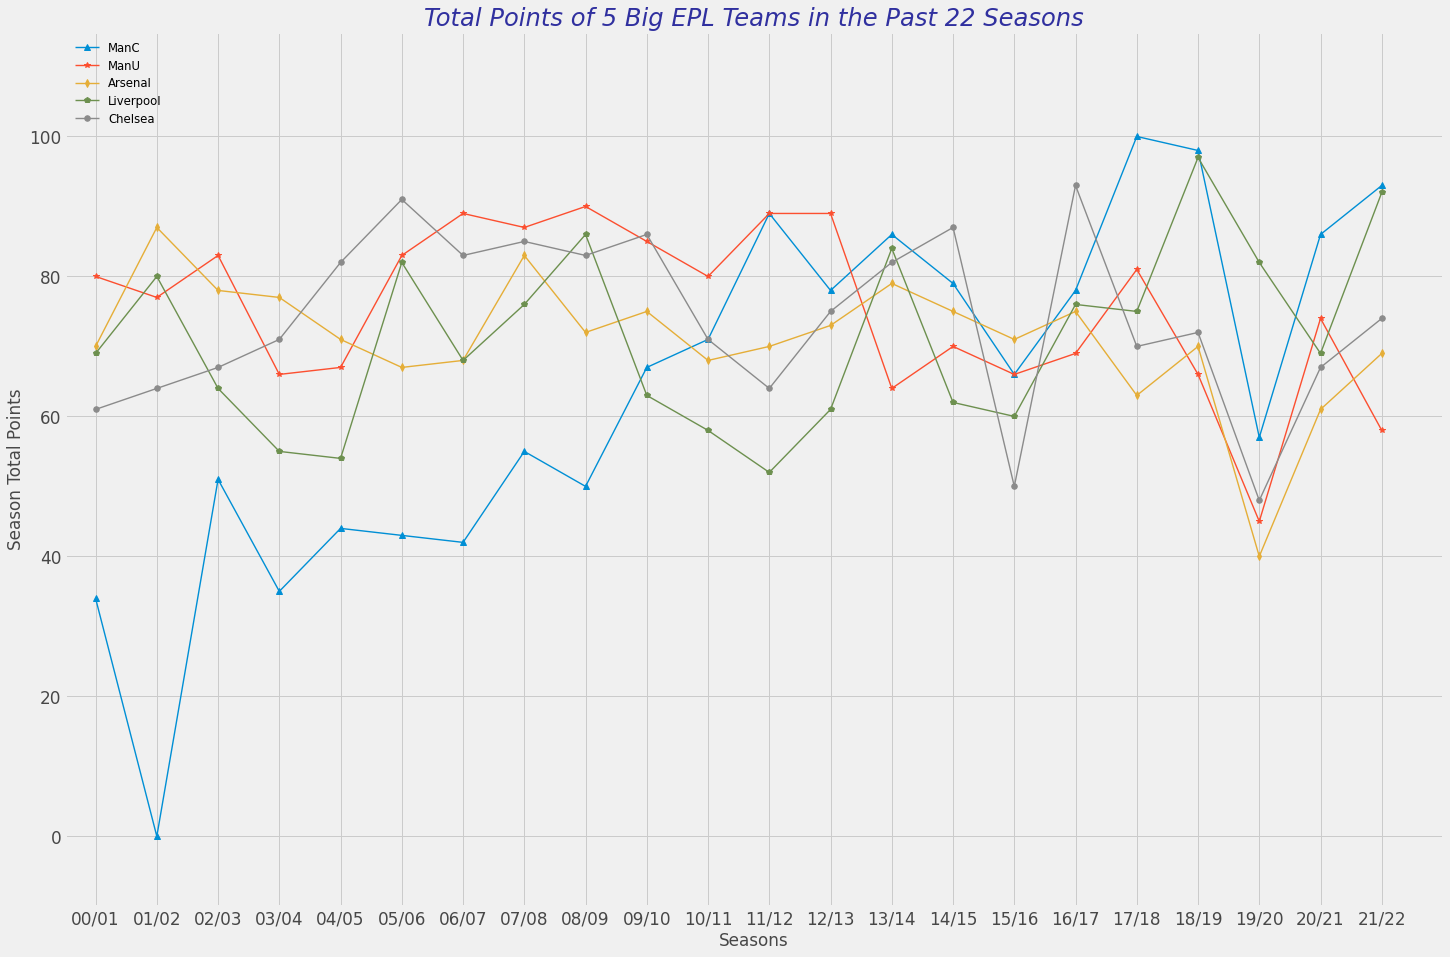

In [33]:
# Line Plots: Total Points of Five Teams in the past 22 seasons

plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(22, 15))

Analysis_df_lst = [ManC_Analysis_, ManU_Analysis, Arsen_Analysis, Liverp_Analysis, Chels_Analysis]

marker_lst = ['^', '*', 'd', 'p', 'o']
i = 0
while i < len(marker_lst):
    for df in Analysis_df_lst:
        plt.plot(x_pos, np.array(df['Points'].values), marker=marker_lst[i], linewidth=1.4, markersize=5.5)
        i = i + 1

plt.xlabel('Seasons', alpha=0.7, size='large')
plt.ylabel('Season Total Points', alpha=0.7, size='large')
plt.xticks(x_pos, x, alpha=0.7, size='large')
plt.yticks(alpha=0.7, size='large')
plt.ylim(-10, 115)
plt.xlim(-0.5, 22)
plt.title('Total Points of 5 Big EPL Teams in the Past 22 Seasons', alpha=0.8, color='Darkblue',
           style='italic', fontsize='xx-large')
plt.legend(['ManC', 'ManU', 'Arsenal', 'Liverpool', 'Chelsea'], loc=2, frameon=False, fontsize='small')

plt.savefig('TotalPts_5Big.png')
plt.show()

#### 2. Horizontal Bar Chart: Man United Goals Conceded and Scored When Playing at Home and Away


In [34]:
ManU_Analysis['Away_Goals_Conceded'] *= -1
ManU_Analysis['Home_Goals_Conceded'] *= -1
Liverp_Analysis['Away_Goals_Conceded'] *= -1
Liverp_Analysis['Home_Goals_Conceded'] *= -1

In [35]:
ManU_Analysis

,Season,Home_Goals_Scored,Away_Goals_Scored,Points,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Games_Played,Home_Goals_Conceded,Away_Goals_Conceded
0,00/01,49,30,80,323,233,152,112,38,-12,-19
1,01/02,40,47,77,285,254,126,130,38,-17,-28
2,02/03,42,32,83,309,222,180,128,38,-12,-22
3,03/04,36,23,66,243,194,130,116,34,-15,-18
4,04/05,27,21,67,293,230,158,123,33,-7,-13
5,05/06,37,35,83,324,231,171,115,38,-8,-26
6,06/07,46,37,89,355,272,194,148,38,-12,-15
7,07/08,47,33,87,353,267,209,144,38,-7,-15
8,08/09,43,25,90,351,270,217,159,38,-13,-11
9,09/10,52,34,85,343,273,195,149,38,-12,-16


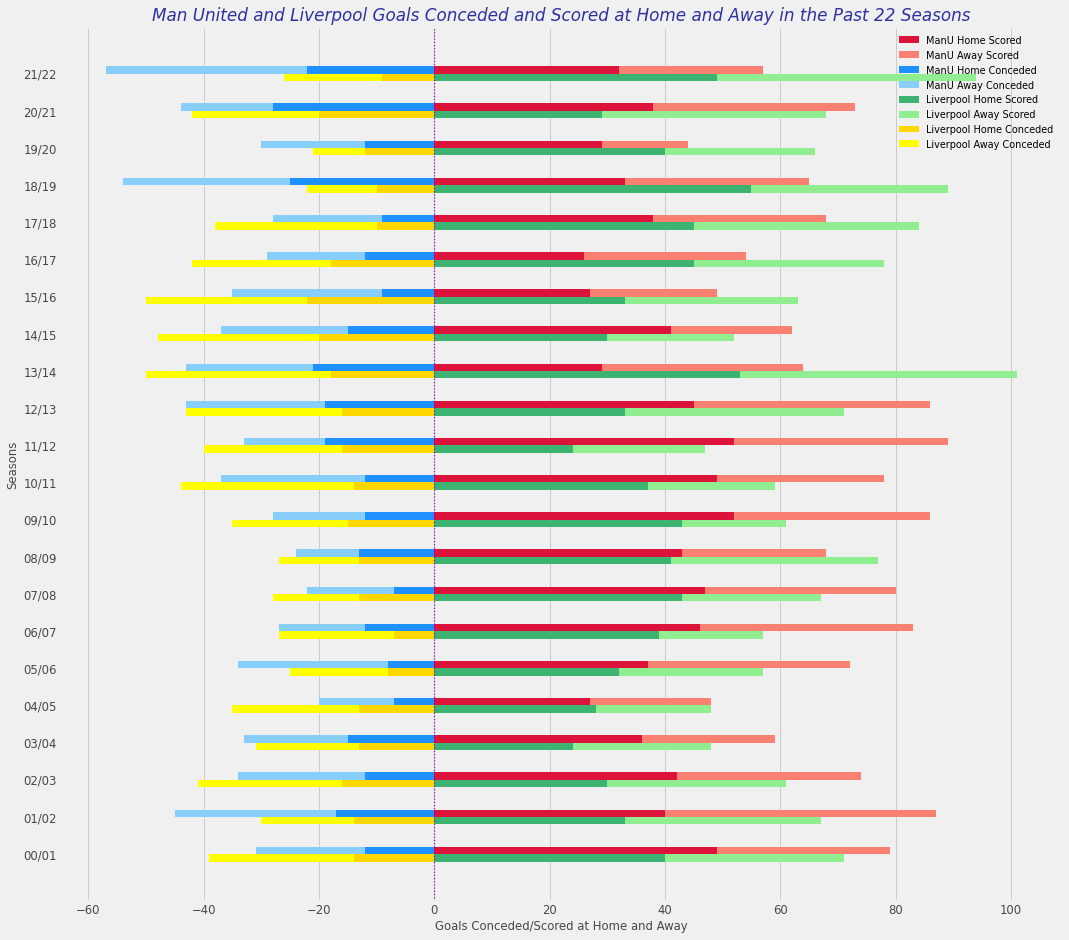

In [36]:
fig = plt.figure(figsize=(16, 15))
plt.barh(x_pos + 0.1, ManU_Analysis['Home_Goals_Scored'].values, height=0.2, color='crimson')
plt.barh(x_pos + 0.1, ManU_Analysis['Away_Goals_Scored'].values, height=0.2, 
         left=ManU_Analysis['Home_Goals_Scored'].values, color='salmon')
plt.barh(x_pos + 0.1, ManU_Analysis['Home_Goals_Conceded'].values, height=0.2, color='dodgerblue')
plt.barh(x_pos + 0.1, ManU_Analysis['Away_Goals_Conceded'].values, height=0.2, 
         left=ManU_Analysis['Home_Goals_Conceded'].values, color='lightskyblue')


plt.barh(x_pos - 0.1, Liverp_Analysis['Home_Goals_Scored'].values, height=0.2, color='mediumseagreen')
plt.barh(x_pos - 0.1 , Liverp_Analysis['Away_Goals_Scored'].values, height=0.2, 
         left=Liverp_Analysis['Home_Goals_Scored'].values, color='lightgreen')
plt.barh(x_pos - 0.1, Liverp_Analysis['Home_Goals_Conceded'].values, height=0.2, color='gold')
plt.barh(x_pos - 0.1, Liverp_Analysis['Away_Goals_Conceded'].values, height=0.2, 
         left=Liverp_Analysis['Home_Goals_Conceded'].values, color='yellow')


plt.title('Man United and Liverpool Goals Conceded and Scored at Home and Away in the Past 22 Seasons', alpha=0.8, color='Darkblue',
            style='italic', fontsize='large')
plt.xlabel('Goals Conceded/Scored at Home and Away', alpha=0.7, size='small')
plt.ylabel('Seasons', alpha=0.7, size='small')
plt.yticks(x_pos, x, alpha=0.7, size='small')
plt.xticks(alpha=0.7, size='small')
plt.legend(['ManU Home Scored', 'ManU Away Scored', 'ManU Home Conceded', 
            'ManU Away Conceded', 'Liverpool Home Scored', 'Liverpool Away Scored', 'Liverpool Home Conceded', 
            'Liverpool Away Conceded'], loc='best', frameon=False, fontsize='x-small')
ax = plt.gca()
ax.yaxis.grid()

plt.axvline(0, linestyle='dotted', color='darkviolet', linewidth=1.2)

plt.savefig('Comp_Scored_Conceded.png')

plt.show()


#### 3. Line Chart and Bar Chart: Total Shots, Shots-on-Target, Shots Accuracy 

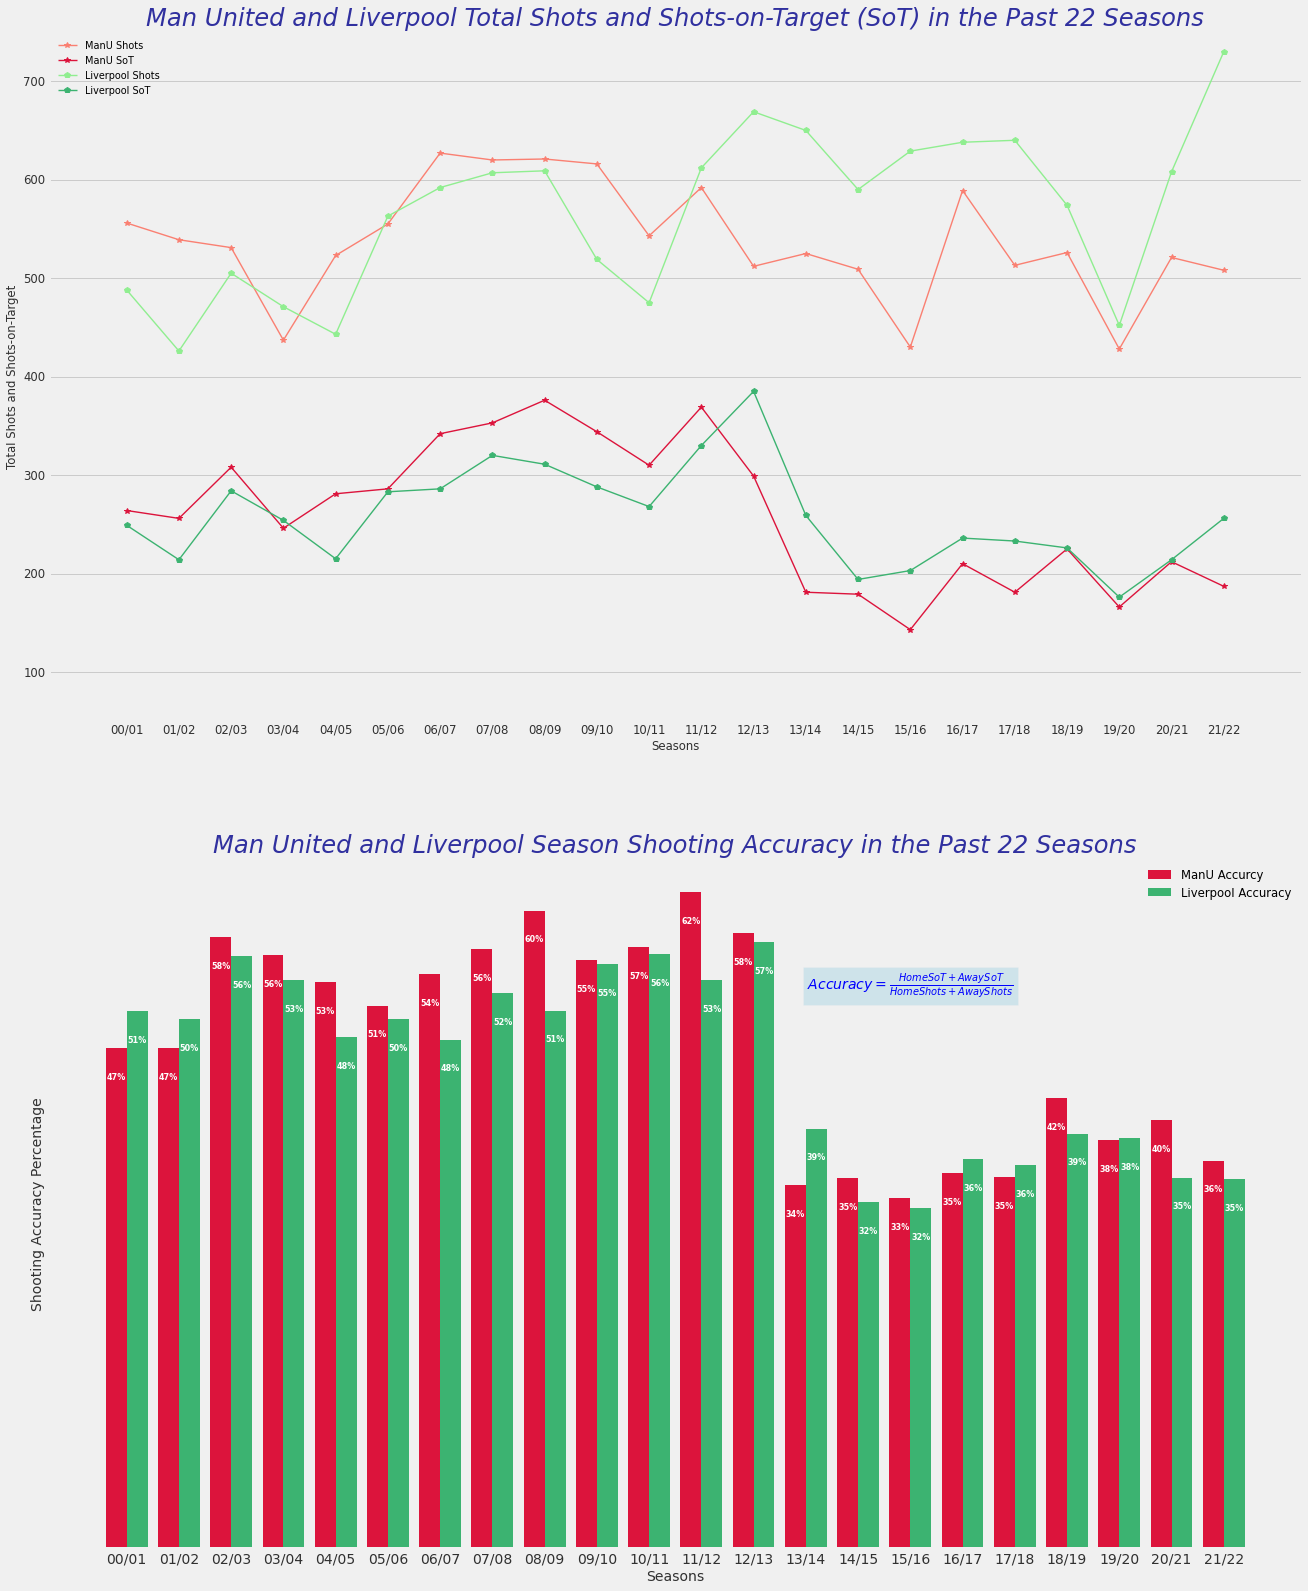

In [37]:
# Line Chart

fig = plt.figure(figsize=(20, 26))
ax1 = plt.subplot(2, 1, 1)

plt.plot(x_pos, np.array((ManU_Analysis['Home_Shots'] + ManU_Analysis['Away_Shots']).values), marker='*', 
         linewidth=1.4, markersize=5.5, color='salmon')
plt.plot(x_pos, np.array((ManU_Analysis['Home_Shots_On_Target'] + ManU_Analysis['Away_Shots_On_Target']).values), 
        marker='*', linewidth=1.4, markersize=5.5, color='crimson')
plt.plot(x_pos, np.array((Liverp_Analysis['Home_Shots'] + Liverp_Analysis['Away_Shots']).values), marker='p', 
         linewidth=1.4, markersize=5.5, color='lightgreen')
plt.plot(x_pos, np.array((Liverp_Analysis['Home_Shots_On_Target'] + Liverp_Analysis['Away_Shots_On_Target']).values),
        marker='p', linewidth=1.4, markersize=5.5, color='mediumseagreen')

plt.title('Man United and Liverpool Total Shots and Shots-on-Target (SoT) in the Past 22 Seasons', alpha=0.8, color='Darkblue',
            style='italic', fontsize='xx-large')
plt.ylabel('Total Shots and Shots-on-Target', alpha=0.8, size='small')
plt.xlabel('Seasons', alpha=0.8, size='small')
plt.xticks(x_pos, x, alpha=0.8, size='small')
plt.yticks(alpha=0.8, size='small')
plt.ylim(50, 750)
plt.legend(['ManU Shots', 'ManU SoT', 'Liverpool Shots', 
            'Liverpool SoT'], loc='best', frameon=False, fontsize='x-small')

# Only Getting Horizontal Gridlines to Appear in Line Plot
ax1 = plt.gca()
ax1.xaxis.grid()


# Bar Chart
plt.subplot(2, 1, 2, sharex=ax1)


Accuracy_ManU = ((ManU_Analysis['Home_Shots_On_Target'] + ManU_Analysis['Away_Shots_On_Target']) 
           / (ManU_Analysis['Home_Shots'] + ManU_Analysis['Away_Shots'])).values

Accuracy_Liverp = ((Liverp_Analysis['Home_Shots_On_Target'] + Liverp_Analysis['Away_Shots_On_Target']) 
           / (Liverp_Analysis['Home_Shots'] + Liverp_Analysis['Away_Shots'])).values
bars = plt.bar(x_pos - 0.2 , Accuracy_ManU * 100, width=0.4, color='crimson')
bars_lvp = plt.bar(x_pos + 0.2 , Accuracy_Liverp * 100, width=0.4, color='mediumseagreen')


plt.title('Man United and Liverpool Season Shooting Accuracy in the Past 22 Seasons', alpha=0.8, color='Darkblue',
            style='italic', fontsize='xx-large')
plt.ylabel('Shooting Accuracy Percentage', alpha=0.8, size='medium')
plt.xlabel('Seasons', alpha=0.8, size='medium')
plt.xticks(x_pos, x, alpha=0.8, size='medium')
plt.yticks(alpha=0.8, size='medium')
plt.legend(['ManU Accurcy', 'Liverpool Accuracy'], loc=1, frameon=False, fontsize='small')

plt.text(15, 53, r'$Accuracy = \frac{HomeSoT + AwaySoT}{HomeShots + AwayShots}$',
        horizontalalignment='center', fontsize='medium', color='b', bbox=dict(facecolor='lightblue', alpha=0.5))

# Remove the horizontal and vertical grids
ax2 = plt.gca()
ax2.xaxis.grid()
ax2.yaxis.grid()

# Direct Label Each Bar with Y axis values
for bar in bars:
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 3, str(int(bar.get_height())) 
            + '%', ha='center', color='w',fontsize=8, fontweight='semibold')
    
for bar in bars_lvp:
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 3, str(int(bar.get_height())) 
            + '%', ha='center', color='w',fontsize=8, fontweight='semibold')

# Remove All the Ticks (Both Axes), and Tick Labels on the Y Axis    
plt.tick_params(top=False, bottom=False, left=False, right=False, 
                labelleft=False, labelbottom=True)  

plt.savefig('Comp_TotalShots_SoT_Accuracy.png')

---
## III. Machine Learning Part

### Data Cleaning and Preprocessing for Machine Learning and Missing Values Handling

We use all teams data in the past 22 seasons to train the models

In [38]:
pd.read_csv('data/E0-14-15.csv') # have empty row in dataset

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,16/08/14,Arsenal,Crystal Palace,2.0,1.0,H,1.0,1.0,D,...,2.10,24.0,-1.50,1.81,1.78,2.20,2.10,1.29,5.90,12.75
1,E0,16/08/14,Leicester,Everton,2.0,2.0,D,1.0,2.0,A,...,1.80,22.0,0.25,1.88,1.85,2.10,2.02,3.11,3.40,2.47
2,E0,16/08/14,Man United,Swansea,1.0,2.0,A,0.0,1.0,A,...,2.13,25.0,-1.50,2.18,2.08,1.87,1.79,1.45,4.81,8.25
3,E0,16/08/14,QPR,Hull,0.0,1.0,A,0.0,0.0,D,...,1.58,24.0,0.00,1.80,1.73,2.25,2.14,2.31,3.24,3.59
4,E0,16/08/14,Stoke,Aston Villa,0.0,1.0,A,0.0,0.0,D,...,1.60,23.0,-0.50,1.95,1.91,2.02,1.96,2.01,3.34,4.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,E0,24/05/15,Leicester,QPR,5.0,1.0,H,2.0,0.0,H,...,2.41,28.0,-1.00,1.98,1.93,1.98,1.93,1.53,4.94,6.13
377,E0,24/05/15,Man City,Southampton,2.0,0.0,H,1.0,0.0,H,...,2.66,28.0,-1.00,2.00,1.94,2.03,1.93,1.60,4.35,6.00
378,E0,24/05/15,Newcastle,West Ham,2.0,0.0,H,0.0,0.0,D,...,2.25,25.0,-0.50,1.82,1.78,2.20,2.10,1.76,4.01,4.98
379,E0,24/05/15,Stoke,Liverpool,6.0,1.0,H,5.0,0.0,H,...,1.99,25.0,0.25,2.07,2.02,1.88,1.85,3.56,3.60,2.17


In [39]:
matches_22seasons = []

def data_clean_ml(csv, season, columns_to_keep):
    """
    Return new dataframes of all teams covering their 22 seasons England Premier League data 
    with new columns name and new Season column.
    """
    
    # Loading Data and remove the empty row
    df = pd.read_csv(csv, on_bad_lines='skip', encoding_errors='ignore').dropna(axis=0,how='all')
    
    # England Premier League DataFrame
    EPL_df = df[columns_to_keep].copy()
    EPL_df.loc[:, 'Season'] = season
    EPL_df.loc[:, 'Games_Played'] = 1
    EPL_df.rename(
        columns={
            'FTHG':'Home_Full_Time_Goals_Scored', 
            'FTAG':'Away_Full_Time_Goals_Scored',
            'FTR':'Full_Time_Result',
            'HTHG':'Home_Half_Time_Goal_Scored',
            'HTAG':'Away_Half_Time_Goals_Scored',
            'HS':'Home_Shots',
            'AS':'Away_Shots',
            'HST':'Home_Shots_On_Target', 
            'AST':'Away_Shots_On_Target',
            'HF':'Home_Fouls_Committed',
            'AF':'Away_Fouls_Committed', 
            'HC':'Home_Corners',
            'AC':'Away_Corners',
            'HY':'Home_Yellow_Cards',
            'AY':'Away_Yellow_Cards',
            'HR':'Home_Red_Cards',
            'AR':'Away_Red_Cards'
        }, 
        inplace=True
        )
    
    # Appending Datasets to Obtain 22 Seasons' DataFrame 
    matches_22seasons.append(EPL_df)
    
    return matches_22seasons


# csv List and Season List
csv_lst = ['0001.csv', '0102.csv', '0203.csv', '0304.csv', '0405.csv', '0506.csv', '0607.csv', 'E0-07-08.csv', 'E0-08-09.csv', 'E0-09-10.csv', 'E0-10-11.csv', 'E0-11-12.csv', 'E0-12-13.csv', 
           'E0-13-14.csv', 'E0-14-15.csv', 'E0-15-16.csv', 'E0-16-17.csv', 'E0-17-18.csv', 
           'E0-18-19.csv', 'E0-19-20.csv', 'E0-20-21.csv', 'E0-21-22.csv']
for i in range(len(csv_lst)):
    csv_lst[i] = 'data/' + csv_lst[i]
    
season_lst = ['00/01', '01/02', '02/03', '03/04', '04/05', '05/06', '06/07', '07/08', '08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', 
              '17/18', '18/19', '19/20', '20/21', '21/22']

# Calling data_clean Function
for csv, season in zip(csv_lst, season_lst): 
    data_clean_ml(csv, season, kept_columns)
    
all_matches = pd.concat(matches_22seasons)
all_matches.reset_index(inplace=True)
    
all_matches = all_matches.drop(['index'], axis=1)
all_matches

,Date,HomeTeam,AwayTeam,Home_Full_Time_Goals_Scored,Away_Full_Time_Goals_Scored,Full_Time_Result,Home_Half_Time_Goal_Scored,Away_Half_Time_Goals_Scored,Home_Shots,Away_Shots,...,Home_Fouls_Committed,Away_Fouls_Committed,Home_Corners,Away_Corners,Home_Yellow_Cards,Away_Yellow_Cards,Home_Red_Cards,Away_Red_Cards,Season,Games_Played
0,19/08/00,Charlton,Man City,4.0,0.0,H,2.0,0.0,17.0,8.0,...,13.0,12.0,6.0,6.0,1.0,2.0,0.0,0.0,00/01,1
1,19/08/00,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,17.0,12.0,...,19.0,14.0,7.0,7.0,1.0,2.0,0.0,0.0,00/01,1
2,19/08/00,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,6.0,16.0,...,15.0,21.0,8.0,4.0,5.0,3.0,1.0,0.0,00/01,1
3,19/08/00,Derby,Southampton,2.0,2.0,D,1.0,2.0,6.0,13.0,...,11.0,13.0,5.0,8.0,1.0,1.0,0.0,0.0,00/01,1
4,19/08/00,Leeds,Everton,2.0,0.0,H,2.0,0.0,17.0,12.0,...,21.0,20.0,6.0,4.0,1.0,3.0,0.0,0.0,00/01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8173,22/05/2022,Crystal Palace,Man United,1.0,0.0,H,1.0,0.0,6.0,10.0,...,12.0,22.0,3.0,6.0,2.0,4.0,0.0,0.0,21/22,1
8174,22/05/2022,Leicester,Southampton,4.0,1.0,H,0.0,0.0,12.0,7.0,...,10.0,5.0,3.0,3.0,0.0,1.0,0.0,0.0,21/22,1
8175,22/05/2022,Liverpool,Wolves,3.0,1.0,H,1.0,1.0,29.0,7.0,...,6.0,3.0,5.0,3.0,1.0,0.0,0.0,0.0,21/22,1
8176,22/05/2022,Man City,Aston Villa,3.0,2.0,H,0.0,1.0,24.0,4.0,...,5.0,11.0,13.0,1.0,0.0,1.0,0.0,0.0,21/22,1


- Convert the full time result ('H', 'A', 'D') to number (1, -1, 0)

In [40]:
def convert_full_time_result_to_number(match):
    if match['Full_Time_Result'] == 'H':
        return 1
    elif match['Full_Time_Result'] == 'A':
        return -1
    else:
        return 0

all_matches['Result'] = all_matches.apply(lambda match: convert_full_time_result_to_number(match), axis=1)

In [41]:
all_matches.to_csv('all_matches_22.csv')

In [42]:
all_matches.isnull().sum()

Date                           0
HomeTeam                       0
AwayTeam                       0
Home_Full_Time_Goals_Scored    0
Away_Full_Time_Goals_Scored    0
Full_Time_Result               0
Home_Half_Time_Goal_Scored     0
Away_Half_Time_Goals_Scored    0
Home_Shots                     0
Away_Shots                     0
Home_Shots_On_Target           0
Away_Shots_On_Target           0
Home_Fouls_Committed           0
Away_Fouls_Committed           0
Home_Corners                   0
Away_Corners                   0
Home_Yellow_Cards              0
Away_Yellow_Cards              0
Home_Red_Cards                 0
Away_Red_Cards                 0
Season                         0
Games_Played                   0
Result                         0
dtype: int64

### Data Visulization - Correlations between variables and visualzaiton of all features

In [43]:
all_matches_ = all_matches.copy()

#### 1. Correlation matrix heatmap

In [44]:
feat = ['Home_Full_Time_Goals_Scored','Away_Full_Time_Goals_Scored','Home_Half_Time_Goal_Scored', 
        'Away_Half_Time_Goals_Scored','Home_Shots', 'Away_Shots', 'Home_Shots_On_Target', 
       'Away_Shots_On_Target', 'Home_Fouls_Committed', 'Away_Fouls_Committed', 
       'Home_Corners', 'Away_Corners', 'Home_Yellow_Cards', 
       'Away_Yellow_Cards', 'Home_Red_Cards', 'Away_Red_Cards', 'Result']

<AxesSubplot:>

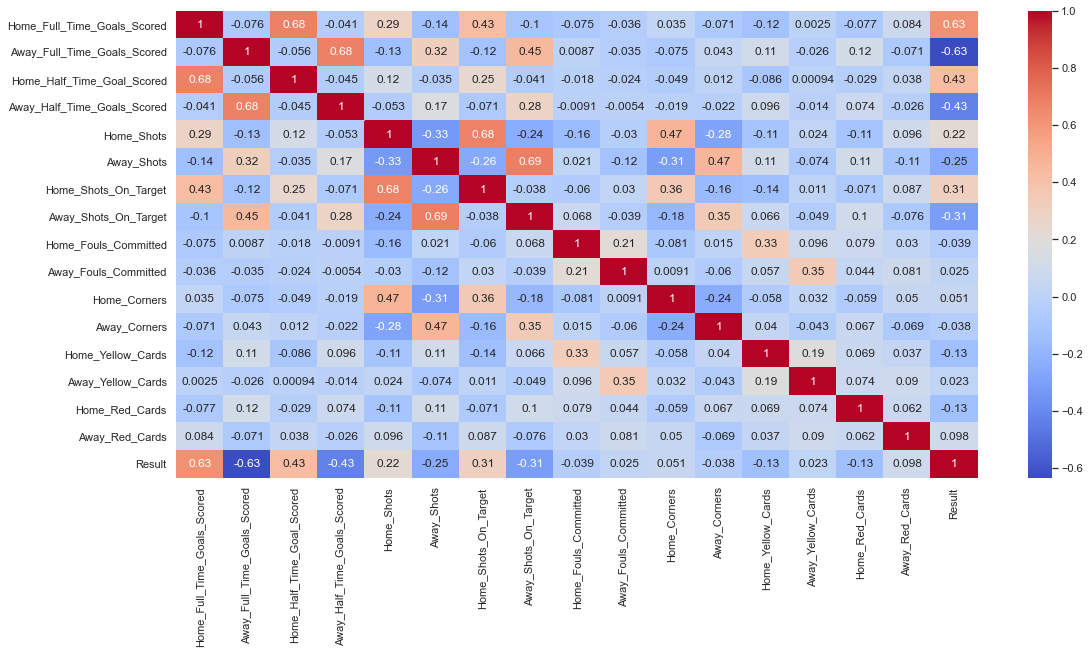

In [45]:
sns.set(rc = {'figure.figsize': (16,8)})
sns.heatmap(all_matches_.loc[:, feat].corr(), annot=True, fmt='.2g',cmap= 'coolwarm')

#### 2. Compute the correlations between each feature and the target 'Result'

In [46]:
correlation = all_matches_.loc[:, feat].corr()['Result'][:].sort_values(ascending=False).to_frame()
correlation

,Result
Result,1.000000
Home_Full_Time_Goals_Scored,0.626351
Home_Half_Time_Goal_Scored,0.431974
Home_Shots_On_Target,0.314672
Home_Shots,0.222069
Away_Red_Cards,0.097540
Home_Corners,0.051404
Away_Fouls_Committed,0.024874
Away_Yellow_Cards,0.022645
Away_Corners,-0.037536


#### 3. Drop Full_Time_Result	which has been converted to number in Result

In [47]:
all_matches_ = all_matches_.drop(['Full_Time_Result'], axis=1)

data = all_matches_.copy()
data

,Date,HomeTeam,AwayTeam,Home_Full_Time_Goals_Scored,Away_Full_Time_Goals_Scored,Home_Half_Time_Goal_Scored,Away_Half_Time_Goals_Scored,Home_Shots,Away_Shots,Home_Shots_On_Target,...,Away_Fouls_Committed,Home_Corners,Away_Corners,Home_Yellow_Cards,Away_Yellow_Cards,Home_Red_Cards,Away_Red_Cards,Season,Games_Played,Result
0,19/08/00,Charlton,Man City,4.0,0.0,2.0,0.0,17.0,8.0,14.0,...,12.0,6.0,6.0,1.0,2.0,0.0,0.0,00/01,1,1
1,19/08/00,Chelsea,West Ham,4.0,2.0,1.0,0.0,17.0,12.0,10.0,...,14.0,7.0,7.0,1.0,2.0,0.0,0.0,00/01,1,1
2,19/08/00,Coventry,Middlesbrough,1.0,3.0,1.0,1.0,6.0,16.0,3.0,...,21.0,8.0,4.0,5.0,3.0,1.0,0.0,00/01,1,-1
3,19/08/00,Derby,Southampton,2.0,2.0,1.0,2.0,6.0,13.0,4.0,...,13.0,5.0,8.0,1.0,1.0,0.0,0.0,00/01,1,0
4,19/08/00,Leeds,Everton,2.0,0.0,2.0,0.0,17.0,12.0,8.0,...,20.0,6.0,4.0,1.0,3.0,0.0,0.0,00/01,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8173,22/05/2022,Crystal Palace,Man United,1.0,0.0,1.0,0.0,6.0,10.0,3.0,...,22.0,3.0,6.0,2.0,4.0,0.0,0.0,21/22,1,1
8174,22/05/2022,Leicester,Southampton,4.0,1.0,0.0,0.0,12.0,7.0,6.0,...,5.0,3.0,3.0,0.0,1.0,0.0,0.0,21/22,1,1
8175,22/05/2022,Liverpool,Wolves,3.0,1.0,1.0,1.0,29.0,7.0,8.0,...,3.0,5.0,3.0,1.0,0.0,0.0,0.0,21/22,1,1
8176,22/05/2022,Man City,Aston Villa,3.0,2.0,0.0,1.0,24.0,4.0,5.0,...,11.0,13.0,1.0,0.0,1.0,0.0,0.0,21/22,1,1


In [48]:
data.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'Home_Full_Time_Goals_Scored',
       'Away_Full_Time_Goals_Scored', 'Home_Half_Time_Goal_Scored',
       'Away_Half_Time_Goals_Scored', 'Home_Shots', 'Away_Shots',
       'Home_Shots_On_Target', 'Away_Shots_On_Target', 'Home_Fouls_Committed',
       'Away_Fouls_Committed', 'Home_Corners', 'Away_Corners',
       'Home_Yellow_Cards', 'Away_Yellow_Cards', 'Home_Red_Cards',
       'Away_Red_Cards', 'Season', 'Games_Played', 'Result'],
      dtype='object')

#### 4.  Statistics and countplot of the results

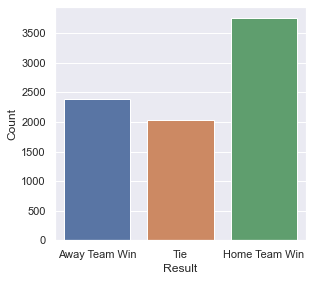

Number of home team winning matches:  3753
Number of tie matches:  2389
Number of away team winning matches:  2036


In [49]:
y = data['Result']
x = data.drop(['Result'], axis=1)
ticks = ['Away Team Win', 'Tie', 'Home Team Win']
plt.figure(figsize=(4, 4))

ax = sns.countplot(y)
plt.xlabel('Result')
plt.ylabel('Count')
ax.set_xticklabels(ticks)

plt.show()

W, T, L = y.value_counts()
print('Number of home team winning matches: ', W)
print('Number of tie matches: ', T)
print('Number of away team winning matches: ', L)

#### 4.  Boxplot for all features

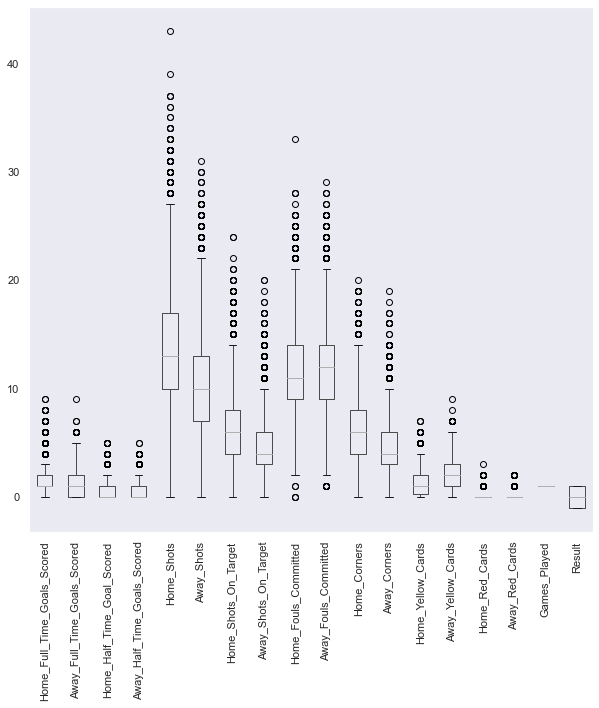

In [50]:
plt.figure(figsize=(9,9))
data.boxplot(grid=False, return_type=None, )
plt.xticks(rotation=90)
plt.show()

#### 5.  Histograms for all features

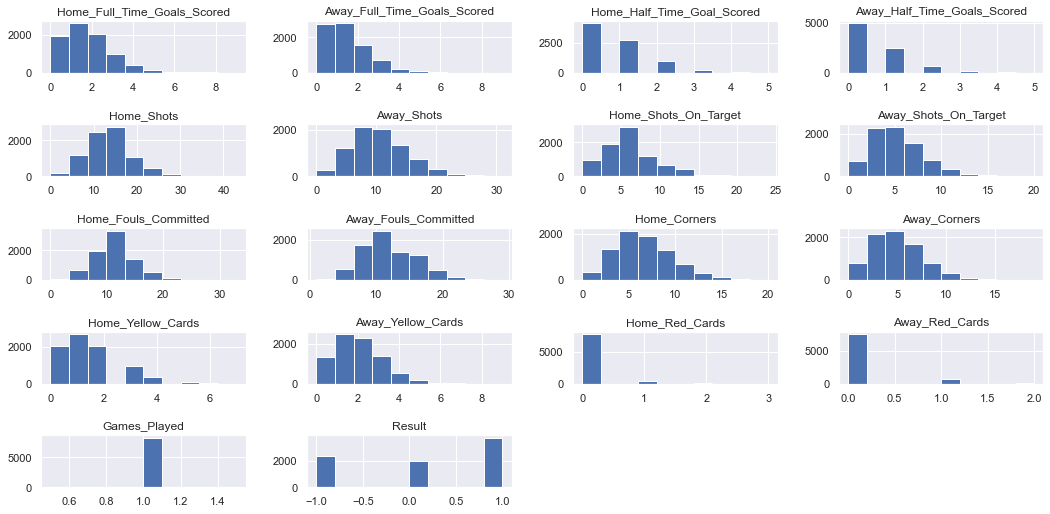

In [51]:
data.hist()
plt.subplots_adjust(hspace=1) 
plt.show()

### Machine Learning Models Training

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [53]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


#### 1. Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.preprocessing import OrdinalEncoder
from heapq import heappush

# preprocess the data
rf_data = data.copy()
enc1 = OrdinalEncoder()
rf_data["HomeTeam_encoding"] = enc1.fit_transform(np.array([[d] for d in data["HomeTeam"].values]))
rf_data["AwayTeam_encoding"] = enc1.transform(np.array([[d] for d in data["AwayTeam"].values]))
features = ['HomeTeam_encoding', 'AwayTeam_encoding', 'Home_Half_Time_Goal_Scored',
       'Away_Half_Time_Goals_Scored', 'Home_Shots', 'Away_Shots',
       'Home_Shots_On_Target', 'Away_Shots_On_Target', 'Home_Fouls_Committed',
       'Away_Fouls_Committed', 'Home_Corners', 'Away_Corners',
       'Home_Yellow_Cards', 'Away_Yellow_Cards', 'Home_Red_Cards',
       'Away_Red_Cards']

In [55]:
# define the classifier function
def decisionTreeModel(selectedFeatures, dataInput):
    # split the train set and test set
    data_train = dataInput[dataInput['Season']!='21/22']
    data_test = dataInput[dataInput['Season']=='21/22']

    x_train = data_train[selectedFeatures]
    y_train = data_train['Result']
    x_test = data_test[selectedFeatures]
    y_test = data_test['Result']

    clf = DecisionTreeClassifier()
    # train the model
    clf = clf.fit(x_train, y_train)
    # get predict values
    y_predict = clf.predict(x_test)
    
    return [clf, clf.score(x_test, y_test)]


clf, accuracy = decisionTreeModel(features, rf_data)
Td = clf.get_depth()
feature_importances = []
print("The tree depth is:", Td)
print("The number of leaves is:", clf.get_n_leaves())
print("The feature importance is:")
# estimate the importance of different features
for name, value in zip(features, clf.feature_importances_):
    feature_importances.append((value, name))
    print('  ' + name + ':', round(value, 4))

# sort features based on importance in descending order
feature_importances.sort(reverse=True, key=lambda feature : feature[0])

The tree depth is: 27
The number of leaves is: 2054
The feature importance is:
  HomeTeam_encoding: 0.0896
  AwayTeam_encoding: 0.078
  Home_Half_Time_Goal_Scored: 0.1293
  Away_Half_Time_Goals_Scored: 0.1167
  Home_Shots: 0.0613
  Away_Shots: 0.0614
  Home_Shots_On_Target: 0.0689
  Away_Shots_On_Target: 0.0615
  Home_Fouls_Committed: 0.0649
  Away_Fouls_Committed: 0.0641
  Home_Corners: 0.0568
  Away_Corners: 0.0517
  Home_Yellow_Cards: 0.0409
  Away_Yellow_Cards: 0.0381
  Home_Red_Cards: 0.0079
  Away_Red_Cards: 0.0091


In [56]:
number_of_features = 0
max_accuracy = 0
clf_with_max_accuracy = None

# take the most important i features to train the model and get the highest accuracy
for i in range(1, 17):
    new_features = [feature_importances[idx][1] for idx in range(0, i)]
    clf, accuracy = decisionTreeModel(new_features, rf_data)
    if(accuracy > max_accuracy):
        number_of_features = i
        max_accuracy = accuracy
        clf_with_max_accuracy = clf
    print("The accuracy of", i, "features is: ", round(accuracy, 4)) 

The accuracy of 1 features is:  0.5474
The accuracy of 2 features is:  0.5947
The accuracy of 3 features is:  0.6132
The accuracy of 4 features is:  0.5395
The accuracy of 5 features is:  0.5737
The accuracy of 6 features is:  0.5289
The accuracy of 7 features is:  0.5447
The accuracy of 8 features is:  0.6079
The accuracy of 9 features is:  0.6
The accuracy of 10 features is:  0.5658
The accuracy of 11 features is:  0.5947
The accuracy of 12 features is:  0.5737
The accuracy of 13 features is:  0.5684
The accuracy of 14 features is:  0.5737
The accuracy of 15 features is:  0.5579
The accuracy of 16 features is:  0.5789


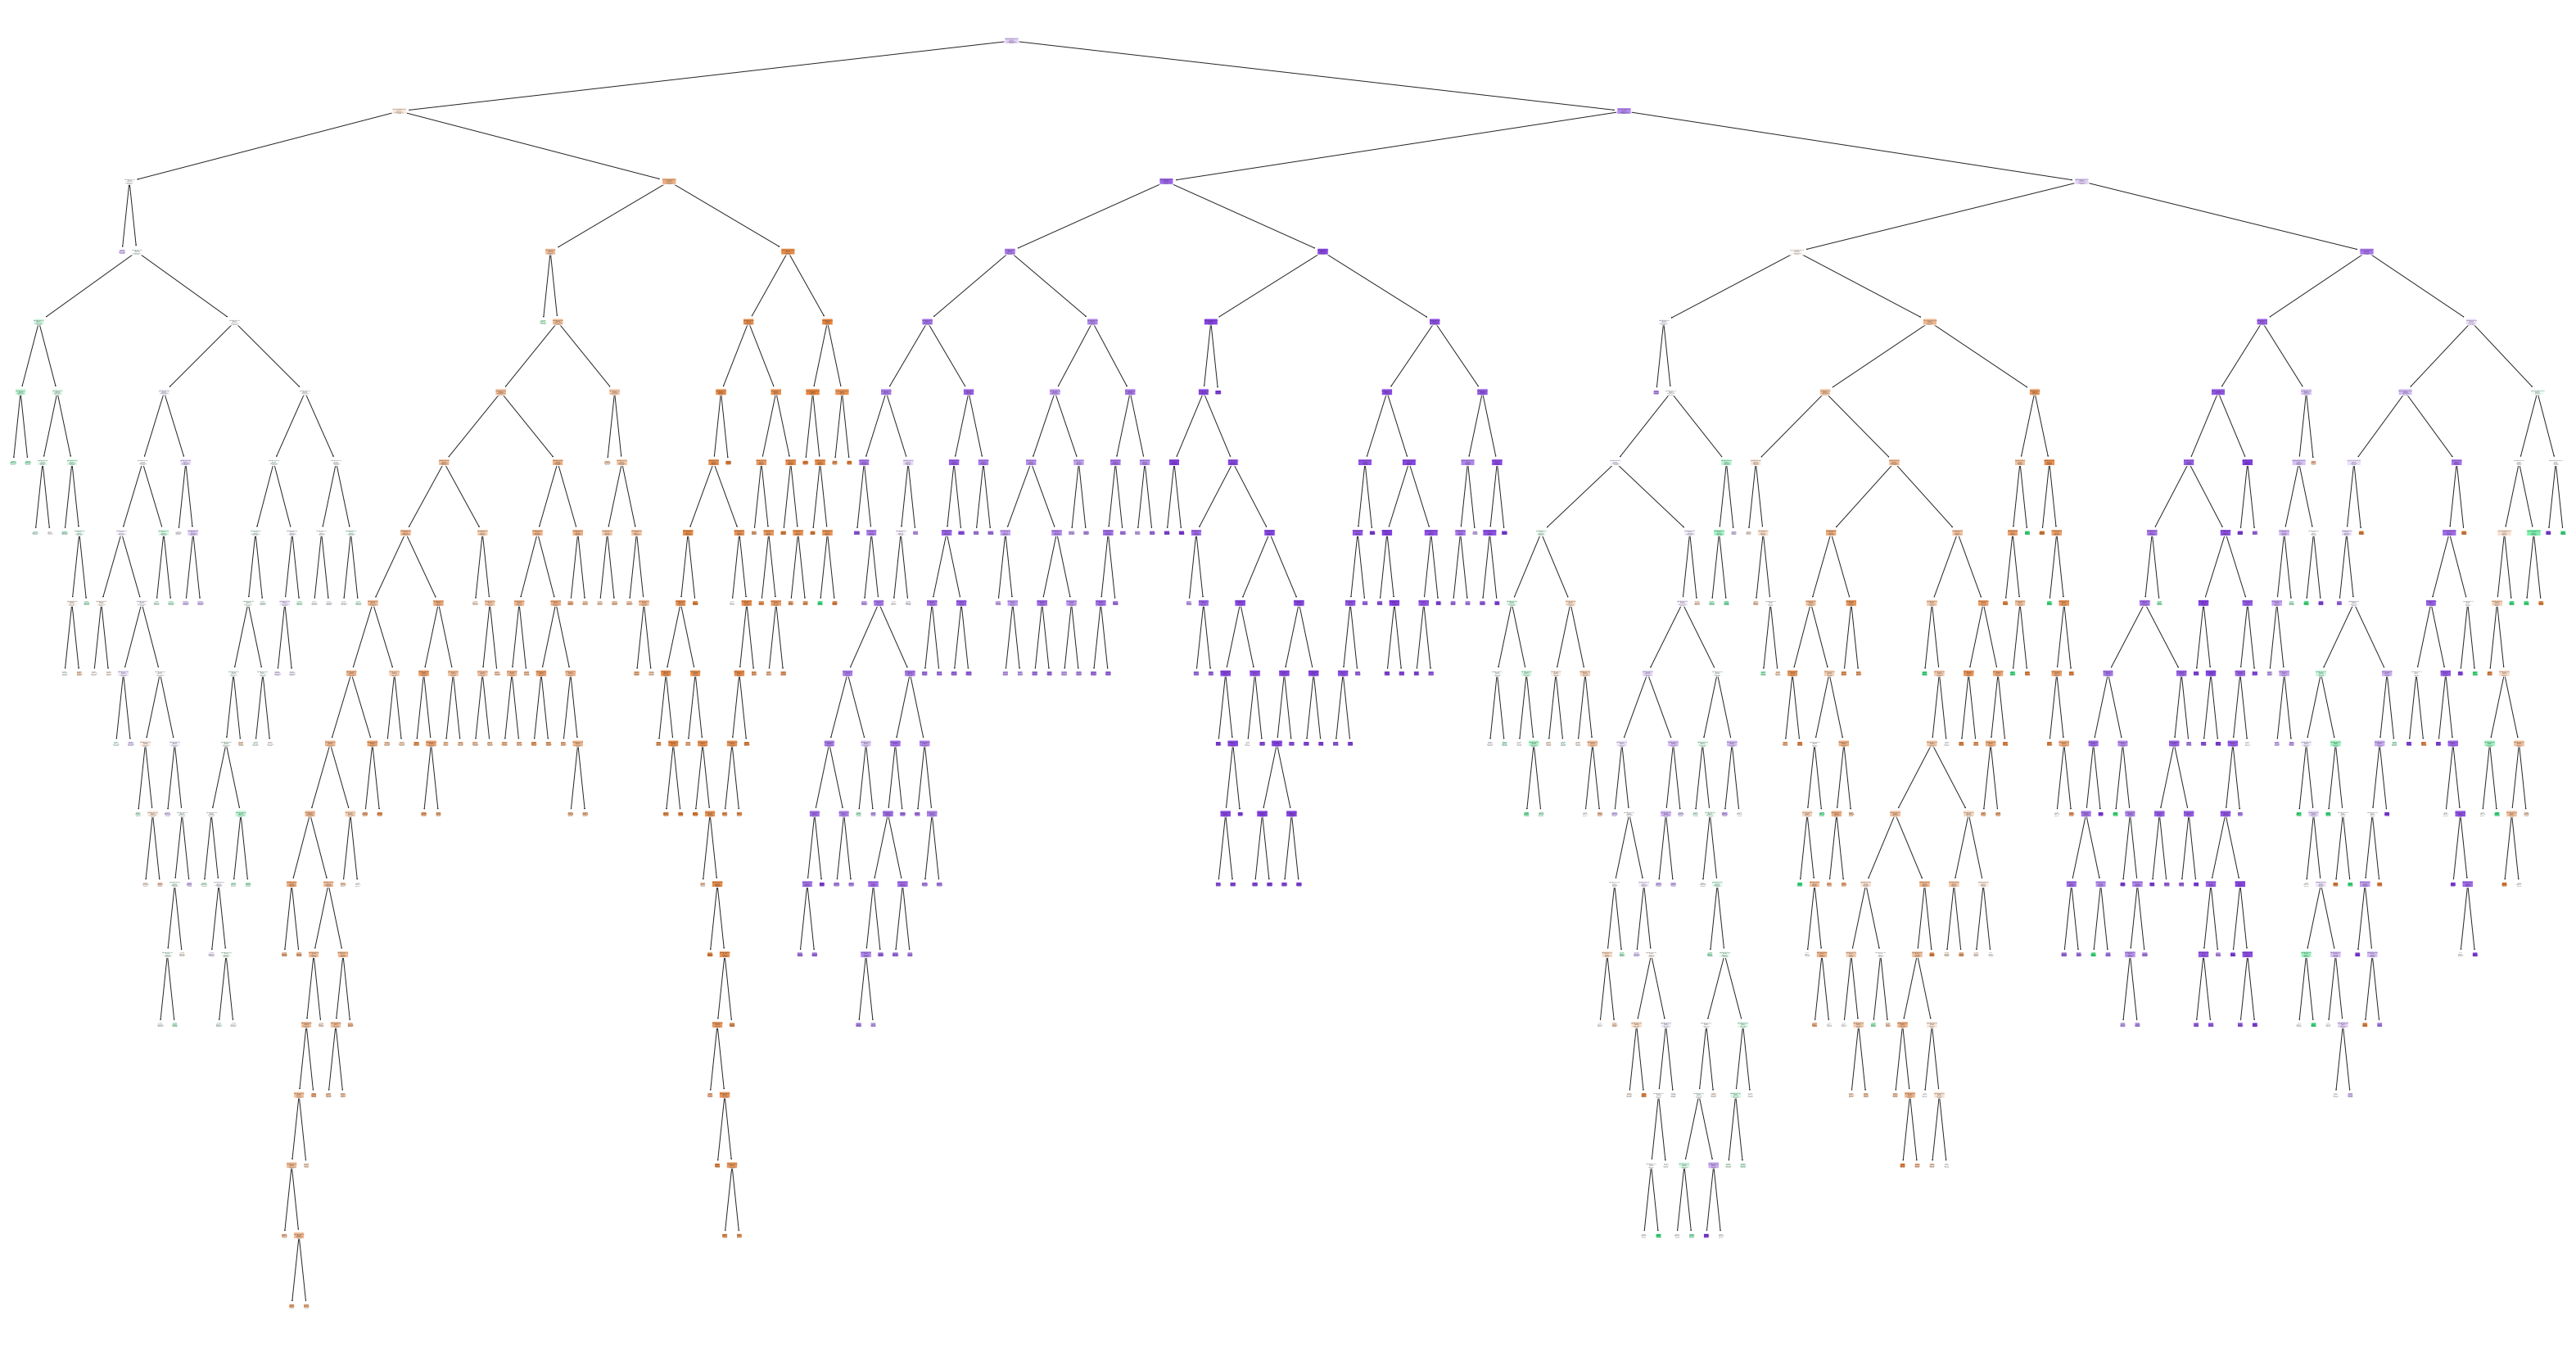

In [57]:
# visulize the decision tree with highest accuracy
feature_names = [feature_importances[idx][1] for idx in range(0, number_of_features)]
target_names = np.array(["lose", "draw", "win"])

plt.figure(figsize=(50,30))
plot_tree(clf_with_max_accuracy, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.show()

**Evaluation metrics for the decision tree with highest accuracy:**

In [58]:
data_train = rf_data[rf_data['Season']!='21/22']
data_test = rf_data[rf_data['Season']=='21/22']
x_train = data_train[features]
y_train = data_train['Result']
x_test = data_test[features]
y_test = data_test['Result']

clf_with_max_accuracy = clf_with_max_accuracy.fit(x_train, y_train)
pred = clf_with_max_accuracy.predict(x_test)

print("Accuracy", accuracy_score(pred, y_test))
print("Precision", precision_score(pred, y_test, average='macro'))
print("Recall", recall_score(pred, y_test, average='macro'))

Accuracy 0.5736842105263158
Precision 0.5454902138808545
Recall 0.5528174603174603


In [59]:
print("Classification Report")
classification_report(y_test, pred, output_dict=True)

Classification Report


{'-1': {'precision': 0.6696428571428571,
  'recall': 0.5813953488372093,
  'f1-score': 0.6224066390041494,
  'support': 129},
 '0': {'precision': 0.34,
  'recall': 0.38636363636363635,
  'f1-score': 0.36170212765957455,
  'support': 88},
 '1': {'precision': 0.6488095238095238,
  'recall': 0.6687116564417178,
  'f1-score': 0.6586102719033232,
  'support': 163},
 'accuracy': 0.5736842105263158,
 'macro avg': {'precision': 0.5528174603174603,
  'recall': 0.5454902138808545,
  'f1-score': 0.5475730128556824,
  'support': 380},
 'weighted avg': {'precision': 0.5843681077694236,
  'recall': 0.5736842105263158,
  'f1-score': 0.5775624157521566,
  'support': 380}}

In [60]:
# Code snippet from https://betfair-datascientists.github.io/modelling/EPLmlPython/
c_matrix = (pd.DataFrame(confusion_matrix(y_test, pred), columns=["Away", "Draw", "Home"], index=["Away", "Draw", "Home"])
 .rename_axis('Actual')
 .rename_axis('Predicted', axis='columns'))
c_matrix

Predicted,Away,Draw,Home
Actual,,,
Away,75,28,26
Draw,21,34,33
Home,16,38,109


#### 2. Support Vector Machines (SVM)

In [61]:
from sklearn import svm
# preprocess the data
rf_data = data.copy()
enc1 = OrdinalEncoder()
rf_data["HomeTeam_encoding"] = enc1.fit_transform(np.array([[d] for d in data["HomeTeam"].values]))
rf_data["AwayTeam_encoding"] = enc1.transform(np.array([[d] for d in data["AwayTeam"].values]))

features = ['HomeTeam_encoding', 'AwayTeam_encoding', 'Home_Half_Time_Goal_Scored',
       'Away_Half_Time_Goals_Scored', 'Home_Shots', 'Away_Shots',
       'Home_Shots_On_Target', 'Away_Shots_On_Target', 'Home_Fouls_Committed',
       'Away_Fouls_Committed', 'Home_Corners', 'Away_Corners',
       'Home_Yellow_Cards', 'Away_Yellow_Cards', 'Home_Red_Cards',
       'Away_Red_Cards']

In [62]:
# define the classifier function
def svmModel(selectedFeatures, dataInput, model='svm'):
    # split the train set and test set
    data_train = dataInput[dataInput['Season']!='21/22']
    data_test = dataInput[dataInput['Season']=='21/22']

    x_train = data_train[selectedFeatures]
    y_train = data_train['Result']
    x_test = data_test[selectedFeatures]
    y_test = data_test['Result']
    # use different svc models
    if model == 'svc':
        clf = svm.SVC()
    elif model == 'nusvc':
        clf = svm.NuSVC()
    elif model == 'linearsvc':
        clf = svm.LinearSVC(dual=False)
    # train the model 
    clf = clf.fit(x_train, y_train)
    # get predict values
    y_predict = clf.predict(x_test)

    feature_names = x_test.columns
    return [clf, clf.score(x_test, y_test)] 

In [63]:
# try different svm models and compare the evaluation metrics
models = ['svc', 'nusvc', 'linearsvc']
for model in models:
    clf, accuracy = svmModel(features, rf_data, model)
    y_predict = clf.predict(x_test)
    print("The accuracy of", model, "model is:", round(accuracy, 4))
    print("The precision score of", model, "model is:", precision_score(y_predict, y_test, average='macro'))
    print("The recall score of", model, "model is:", recall_score(y_predict, y_test, average='macro'))
    print("The classification report of", model, "model is:\n")
    print(classification_report(y_predict, y_test))
    print("Confusion matrix for", model, "model is:\n")
    c_matrix = (pd.DataFrame(confusion_matrix(y_test, y_predict), columns=["Away", "Draw", "Home"], index=["Away", "Draw", "Home"])
 .rename_axis('Actual')
 .rename_axis('Predicted', axis='columns'))
    print(c_matrix)
    print("\n")

The accuracy of svc model is: 0.6763
The precision score of svc model is: 0.5915356302358727
The recall score of svc model is: 0.6172228209335365
The classification report of svc model is:

              precision    recall  f1-score   support

          -1       0.80      0.74      0.77       139
           0       0.07      0.46      0.12        13
           1       0.91      0.65      0.76       228

    accuracy                           0.68       380
   macro avg       0.59      0.62      0.55       380
weighted avg       0.84      0.68      0.74       380

Confusion matrix for svc model is:

Predicted  Away  Draw  Home
Actual                     
Away        103     2    24
Draw         26     6    56
Home         10     5   148


The accuracy of nusvc model is: 0.6263
The precision score of nusvc model is: 0.5806576609294544
The recall score of nusvc model is: 0.5823291291630222
The classification report of nusvc model is:

              precision    recall  f1-score   support

#### 3. Random forest

In [64]:
len(data)
data.count()

Date                           8178
HomeTeam                       8178
AwayTeam                       8178
Home_Full_Time_Goals_Scored    8178
Away_Full_Time_Goals_Scored    8178
Home_Half_Time_Goal_Scored     8178
Away_Half_Time_Goals_Scored    8178
Home_Shots                     8178
Away_Shots                     8178
Home_Shots_On_Target           8178
Away_Shots_On_Target           8178
Home_Fouls_Committed           8178
Away_Fouls_Committed           8178
Home_Corners                   8178
Away_Corners                   8178
Home_Yellow_Cards              8178
Away_Yellow_Cards              8178
Home_Red_Cards                 8178
Away_Red_Cards                 8178
Season                         8178
Games_Played                   8178
Result                         8178
dtype: int64

-----split 80/20-----
Accuracy is:  0.6515892420537898
Classification report: 
              precision    recall  f1-score   support

          -1       0.66      0.70      0.68       491
           0       0.40      0.28      0.33       369
           1       0.73      0.80      0.76       776

    accuracy                           0.65      1636
   macro avg       0.59      0.59      0.59      1636
weighted avg       0.63      0.65      0.64      1636

-----split 95/5-----
Accuracy is:  0.6674816625916871
Classification report: 
              precision    recall  f1-score   support

          -1       0.66      0.75      0.70       117
           0       0.51      0.29      0.37       108
           1       0.72      0.84      0.77       184

    accuracy                           0.67       409
   macro avg       0.63      0.63      0.61       409
weighted avg       0.65      0.67      0.65       409

-----plot accuracy change over tree depth-----


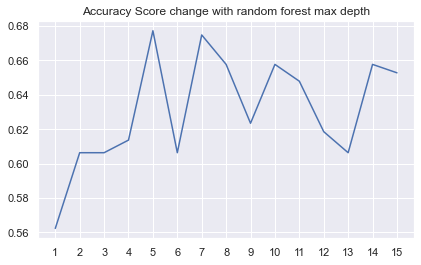

In [65]:
# 1. use all the features to fit a random forest model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from pprint import pprint

rf_data = data.copy()
enc1 = OrdinalEncoder()
rf_data["HomeTeam_encoding"] = enc1.fit_transform(np.array([[d] for d in data["HomeTeam"].values]))
rf_data["AwayTeam_encoding"] = enc1.transform(np.array([[d] for d in data["AwayTeam"].values]))

features = ['HomeTeam_encoding', 'AwayTeam_encoding', 'Home_Half_Time_Goal_Scored',
       'Away_Half_Time_Goals_Scored', 'Home_Shots', 'Away_Shots',
       'Home_Shots_On_Target', 'Away_Shots_On_Target', 'Home_Fouls_Committed',
       'Away_Fouls_Committed', 'Home_Corners', 'Away_Corners',
       'Home_Yellow_Cards', 'Away_Yellow_Cards', 'Home_Red_Cards',
       'Away_Red_Cards']

def fitWithScaler(selectedFeatures, dataInput, testSize, maxDepth, nEstimators, printOutput=True):
    mms = StandardScaler()
    x = dataInput[selectedFeatures]
    y = dataInput[["Result"]]
    x_scaled = mms.fit_transform(x) 
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=testSize)
    rfc = RandomForestClassifier(max_depth=maxDepth, n_estimators=nEstimators)
    rfc.fit(x_train, y_train)
    y_predict = rfc.predict(x_test)
    accuracy = accuracy_score(y_test, y_predict)
    if printOutput:
        print("Accuracy is: ", accuracy)
        print("Classification report: ")
        print(classification_report(y_test, y_predict))
    return accuracy


def plotVariationWithTreeDepth(maxTreeDepth, selectedFeatures, dataInput, testSize, nEstimators, printOutput=True):
    accuracys =[fitWithScaler(selectedFeatures, dataInput, testSize, d, nEstimators, printOutput) for d in range(1, maxTreeDepth + 1)]
    plt.plot([i for i in range(1, maxTreeDepth + 1)], accuracys)
    plt.title("Accuracy Score change with random forest max depth")
    plt.xticks(np.arange(1, maxTreeDepth + 1))
    plt.show()

print("-----split 80/20-----")
fitWithScaler(features, rf_data, 0.2, 20, 100)
print("-----split 95/5-----")
fitWithScaler(features, rf_data, 0.05, 20, 100)
print("-----plot accuracy change over tree depth-----")
plotVariationWithTreeDepth(15, features, rf_data, 0.05, 50, False)

In [66]:
# perform hyperparameter tuning 
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
mms = StandardScaler()
x = rf_data[features]
y = rf_data[["Result"]]
x_scaled = mms.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.05)
rf_random.fit(x_train, y_train)
rf_random.best_params_
# result is ---
# {'n_estimators': 250,
#  'min_samples_split': 10,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 90,
#  'bootstrap': True}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1, 125, 250, 375, 500]}
Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [67]:
rf_best = RandomForestClassifier(max_depth=10, n_estimators=125, min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True)
rf_best.fit(x_train, y_train)
y_predict = rf_best.predict(x_test)

#### Evaluation Metrics for this model:


In [68]:
print("Accuracy", accuracy_score(y_test, y_predict))
print("Precision", precision_score(y_test, y_predict, average='macro'))
print("Recall", recall_score(y_test, y_predict, average='macro'))
print("Classification Report")
cr = classification_report(y_test, y_predict, output_dict=True)
cr

Accuracy 0.6674816625916871
Precision 0.6173887676547251
Recall 0.6024344344344345
Classification Report


{'-1': {'precision': 0.6875,
  'recall': 0.704,
  'f1-score': 0.6956521739130435,
  'support': 125},
 '0': {'precision': 0.46808510638297873,
  'recall': 0.2222222222222222,
  'f1-score': 0.3013698630136986,
  'support': 99},
 '1': {'precision': 0.6965811965811965,
  'recall': 0.8810810810810811,
  'f1-score': 0.7780429594272075,
  'support': 185},
 'accuracy': 0.6674816625916871,
 'macro avg': {'precision': 0.6173887676547251,
  'recall': 0.6024344344344345,
  'f1-score': 0.5916883321179832,
  'support': 409},
 'weighted avg': {'precision': 0.6384974251819957,
  'recall': 0.6674816625916871,
  'f1-score': 0.6374818720575061,
  'support': 409}}

In [69]:
# Code snippet from https://betfair-datascientists.github.io/modelling/EPLmlPython/
from sklearn.metrics import confusion_matrix
c_matrix = (pd.DataFrame(confusion_matrix(y_test, y_predict), columns=["Away", "Draw", "Home"], index=["Away", "Draw", "Home"])
 .rename_axis('Actual')
 .rename_axis('Predicted', axis='columns'))
c_matrix

Predicted,Away,Draw,Home
Actual,,,
Away,88,17,20
Draw,26,22,51
Home,14,8,163


#### recall our analysis of the correlation between each feature and label
Result	1.000000
Home_Full_Time_Goals_Scored	0.626351
Home_Half_Time_Goal_Scored	0.431974
Home_Shots_On_Target	0.314672
Home_Shots	0.222069
Away_Red_Cards	0.097540
Home_Corners	0.051404
Away_Fouls_Committed	0.024874
Away_Yellow_Cards	0.022645
Away_Corners	-0.037536
Home_Fouls_Committed	-0.039468
Home_Red_Cards	-0.131433
Home_Yellow_Cards	-0.132760
Away_Shots	-0.251420
Away_Shots_On_Target	-0.309347
Away_Half_Time_Goals_Scored	-0.427222
Away_Full_Time_Goals_Scored	-0.634610 


In [70]:
# 2. use top 8 strongest correlated features
top8Features = ["Away_Half_Time_Goals_Scored", "Home_Half_Time_Goal_Scored", "Away_Shots_On_Target", "Home_Shots_On_Target", "Home_Shots", "Away_Shots", "Home_Red_Cards", "Away_Red_Cards"]
fitWithScaler(top8Features, rf_data, 0.05, 30, 200)

Accuracy is:  0.6161369193154034
Classification report: 
              precision    recall  f1-score   support

          -1       0.63      0.61      0.62       122
           0       0.36      0.28      0.31        97
           1       0.70      0.79      0.74       190

    accuracy                           0.62       409
   macro avg       0.56      0.56      0.56       409
weighted avg       0.60      0.62      0.60       409



0.6161369193154034

In [71]:
# 3. use top 4 strongest correlated features
top4Features = ["Away_Half_Time_Goals_Scored", "Home_Half_Time_Goal_Scored", "Away_Shots_On_Target", "Home_Shots_On_Target"]
fitWithScaler(top4Features, rf_data, 0.05, 5, 10)

Accuracy is:  0.6405867970660146
Classification report: 
              precision    recall  f1-score   support

          -1       0.66      0.71      0.69       117
           0       0.43      0.17      0.24       108
           1       0.67      0.88      0.76       184

    accuracy                           0.64       409
   macro avg       0.59      0.58      0.56       409
weighted avg       0.60      0.64      0.60       409



0.6405867970660146

In [72]:
# 4. use the first 21 seasons to predict the most recent season instead of random train test split
rf_data[['day', 'month', 'year']] = rf_data['Date'].str.split('/', expand=True)
first21Seasons = rf_data.loc[rf_data['year'] < '2021']
lastSeason = rf_data.loc[rf_data['year'] == '2021']
mms = StandardScaler()
s_train = mms.fit_transform(first21Seasons[features])
s_test = mms.fit_transform(lastSeason[features])
rfc= RandomForestClassifier(max_depth=10, n_estimators=125, min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True)
rfc.fit(s_train, first21Seasons['Result'])
y_predict = rfc.predict(s_test)
rfc.feature_importances_

array([0.05184815, 0.04989009, 0.23112997, 0.17649783, 0.04932461,
       0.05408196, 0.08976188, 0.08626837, 0.03811904, 0.03771025,
       0.03643959, 0.03347899, 0.02757199, 0.02453169, 0.00656676,
       0.00677883])

#### Evaluation Metrics for this model:

In [73]:
print("Accuracy", accuracy_score(lastSeason['Result'], y_predict))
print("Precision", precision_score(lastSeason['Result'], y_predict, average='macro'))
print("Recall", recall_score(lastSeason['Result'], y_predict, average='macro'))
print("Classification Report")
cr = classification_report(lastSeason['Result'], y_predict, output_dict=True)
cr

Accuracy 0.6593137254901961
Precision 0.6262410422035907
Recall 0.607892483539234
Classification Report


{'-1': {'precision': 0.7284768211920529,
  'recall': 0.7284768211920529,
  'f1-score': 0.7284768211920529,
  'support': 151},
 '0': {'precision': 0.5,
  'recall': 0.2903225806451613,
  'f1-score': 0.3673469387755102,
  'support': 93},
 '1': {'precision': 0.6502463054187192,
  'recall': 0.8048780487804879,
  'f1-score': 0.7193460490463216,
  'support': 164},
 'accuracy': 0.6593137254901961,
 'macro avg': {'precision': 0.6262410422035907,
  'recall': 0.607892483539234,
  'f1-score': 0.6050566030046283,
  'support': 408},
 'weighted avg': {'precision': 0.6449519462957597,
  'recall': 0.6593137254901961,
  'f1-score': 0.6424902386022528,
  'support': 408}}

In [74]:
# Code snippet from https://betfair-datascientists.github.io/modelling/EPLmlPython/
from sklearn.metrics import confusion_matrix
c_matrix = (pd.DataFrame(confusion_matrix(lastSeason['Result'], y_predict), columns=["Away", "Draw", "Home"], index=["Away", "Draw", "Home"])
 .rename_axis('Actual')
 .rename_axis('Predicted', axis='columns'))
c_matrix

Predicted,Away,Draw,Home
Actual,,,
Away,110,13,28
Draw,23,27,43
Home,18,14,132


#### 4. Logistic Regression

In [75]:
# Using above train test split with hyperparameter tuning
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()
regr.fit(x_train, y_train)
pred = regr.predict(x_test)

In [76]:
# Code snippet from https://betfair-datascientists.github.io/modelling/EPLmlPython/
from sklearn.metrics import confusion_matrix
c_matrix = (pd.DataFrame(confusion_matrix(y_test, pred), columns=["Away", "Draw", "Home"], index=["Away", "Draw", "Home"])
 .rename_axis('Actual')
 .rename_axis('Predicted', axis='columns'))
c_matrix

Predicted,Away,Draw,Home
Actual,,,
Away,89,17,19
Draw,31,21,47
Home,13,19,153


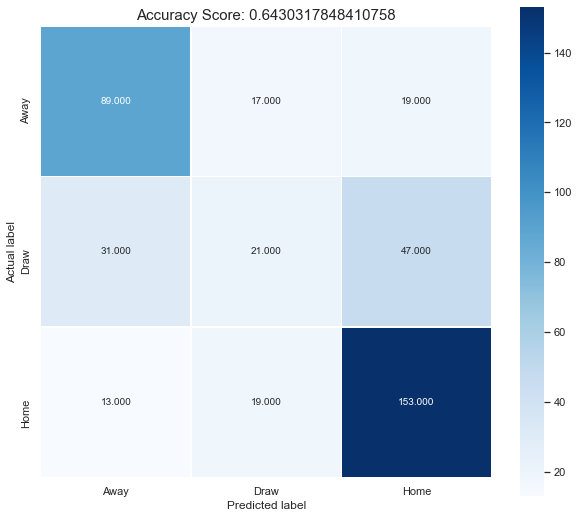

In [77]:
# Code snippet from https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
# Using seaborn to visualize
plt.figure(figsize=(9,9))
sns.heatmap(c_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, pred))
plt.title(all_sample_title, size = 15);

In [78]:
print("Accuracy", accuracy_score(y_test, pred))
print("Precision", precision_score(pred, y_test, average='macro'))
print("Recall", recall_score(pred, y_test, average='macro'))
print("Classification Report")
cr = classification_report(y_test, pred, output_dict=True)
cr

Accuracy 0.6430317848410758
Precision 0.5837160797160797
Recall 0.5787413739829025
Classification Report


{'-1': {'precision': 0.6691729323308271,
  'recall': 0.712,
  'f1-score': 0.689922480620155,
  'support': 125},
 '0': {'precision': 0.3684210526315789,
  'recall': 0.21212121212121213,
  'f1-score': 0.2692307692307693,
  'support': 99},
 '1': {'precision': 0.6986301369863014,
  'recall': 0.827027027027027,
  'f1-score': 0.7574257425742574,
  'support': 185},
 'accuracy': 0.6430317848410758,
 'macro avg': {'precision': 0.5787413739829025,
  'recall': 0.5837160797160797,
  'f1-score': 0.5721929974750606,
  'support': 409},
 'weighted avg': {'precision': 0.6096989635558568,
  'recall': 0.6430317848410758,
  'f1-score': 0.6186257178670005,
  'support': 409}}

In [79]:
from sklearn.metrics import log_loss
pred_probs = regr.predict_proba(x_test)
print("Log loss", log_loss(y_test, pred_probs))

Log loss 0.7504530022068528


In [80]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(regr, x_train, y_train)
cv_scores

array([0.65572716, 0.63835264, 0.65379665, 0.63191763, 0.66258854])

In [81]:
# Using the data for 21 seasons to predict the most recent season instead of random train test split
regr = LogisticRegression()
regr.fit(s_train, first21Seasons['Result'])
pred = regr.predict(s_test)

In [82]:
# Code snippet from https://betfair-datascientists.github.io/modelling/EPLmlPython/
from sklearn.metrics import confusion_matrix
c_matrix = (pd.DataFrame(confusion_matrix(lastSeason['Result'], pred), columns=["Away", "Draw", "Home"], index=["Away", "Draw", "Home"])
 .rename_axis('Actual')
 .rename_axis('Predicted', axis='columns'))
c_matrix

Predicted,Away,Draw,Home
Actual,,,
Away,104,17,30
Draw,20,25,48
Home,11,10,143


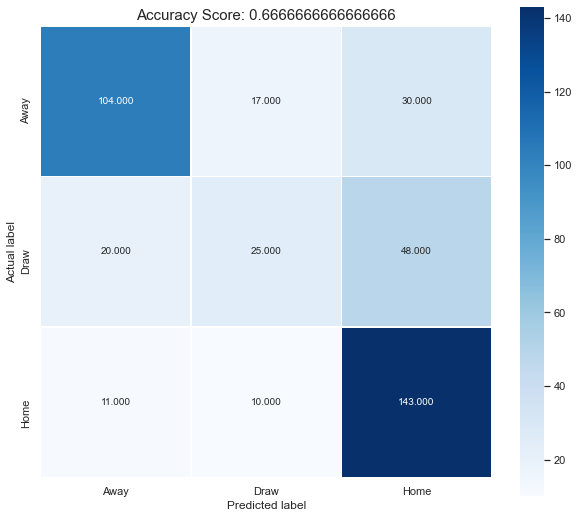

In [83]:
# Code snippet from https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
# Using seaborn to visualize
plt.figure(figsize=(9,9))
sns.heatmap(c_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(lastSeason['Result'], pred))
plt.title(all_sample_title, size = 15);

In [84]:
print("Accuracy", accuracy_score(lastSeason['Result'], pred))
print("Precision", precision_score(lastSeason['Result'], pred, average='macro'))
print("Recall", recall_score(lastSeason['Result'], pred, average='macro'))
print("Classification Report")
cr = classification_report(lastSeason['Result'], pred, output_dict=True)
cr

Accuracy 0.6666666666666666
Precision 0.6327328082230044
Recall 0.6098367152225249
Classification Report


{'-1': {'precision': 0.7703703703703704,
  'recall': 0.6887417218543046,
  'f1-score': 0.7272727272727273,
  'support': 151},
 '0': {'precision': 0.4807692307692308,
  'recall': 0.26881720430107525,
  'f1-score': 0.3448275862068965,
  'support': 93},
 '1': {'precision': 0.6470588235294118,
  'recall': 0.8719512195121951,
  'f1-score': 0.7428571428571429,
  'support': 164},
 'accuracy': 0.6666666666666666,
 'macro avg': {'precision': 0.6327328082230044,
  'recall': 0.6098367152225249,
  'f1-score': 0.6049858187789222,
  'support': 408},
 'weighted avg': {'precision': 0.6547919398193333,
  'recall': 0.6666666666666666,
  'f1-score': 0.6463620557941044,
  'support': 408}}

In [85]:
from sklearn.metrics import log_loss
pred_probs = regr.predict_proba(s_test)
print("Log loss", log_loss(lastSeason['Result'], pred_probs))

Log loss 0.7459149125102716


In [86]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(regr, s_train, first21Seasons['Result'])
cv_scores

array([0.65874587, 0.63366337, 0.64818482, 0.61955086, 0.665786  ])